# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Hari Om

# **Project Summary -**

#Objectives:
**Cluster Zomato Restaurants:** Group restaurants into distinct clusters.

**Sentiment Analysis of Reviews:** Analyze customer reviews to determine positive or negative sentiments, providing insights into customer satisfaction and preferences.
#Business Context:
**Background:** Zomato, an Indian restaurant aggregator and food delivery service, has seen an evolution in the restaurant business in India. The growing number of restaurants and their diversity calls for an insightful analysis of this sector.

**Relevance:** This project is crucial for understanding customer preferences, improving service quality, and enhancing the dining experience in India's dynamic food industry.
#Data Utilization:
**Data Sources:** Restaurant data from Zomato.

**Sentiment Analysis:** Customer reviews will be analyzed to extract sentiment polarity (positive or negative).
#Methodology:
**Data Preprocessing:** Cleaning and structuring data for analysis.

**Clustering Technique:** Utilizing unsupervised machine learning algorithms (like K-means, hierarchical clustering, DBSCAN) to group restaurants.

**Sentiment Analysis:** Employing NLP techniques to analyze and categorize the sentiments of user reviews.

#Outcomes:
**Visualizations:** Graphical representations of clusters and sentiment analysis results for easier interpretation and decision-making.

**Insights for Customers:** Assisting customers in finding the best-suited restaurants based on their preferences.

**Business Strategy for Zomato:** Identification of areas for improvement, popular cuisines, and customer preferences to strategize business growth and customer satisfaction.

#Impact:
**For Customers:** Enhanced decision-making in choosing restaurants aligning with their preferences.

**For Zomato:** Strategic insights into customer preferences, leading to better service offerings and targeted marketing.

#Applications:
**Customer Segmentation:** Identifying different customer segments for targeted marketing.

**Market Analysis:** Understanding popular trends in cuisines and dining experiences.

**Operational Improvement:** Identifying gaps in service and areas for improvement.

**Critic Analysis:** Using reviewer metadata to identify influential critics in the industry.

# **GitHub Link -**

https://github.com/Harry160820/ML-NLP---Zomato-Restaurant-Clustering


# **Problem Statement**


In the evolving Indian restaurant landscape, Zomato faces the challenge of effectively categorizing an increasing number of diverse dining establishments and understanding customer sentiments towards them. This project seeks to address these challenges by employing unsupervised machine learning techniques for clustering restaurants and conducting sentiment analysis of customer reviews. The aim is to gain insights into customer preferences and dining trends, which will enable Zomato to enhance its service offerings, improve customer satisfaction, and make informed business decisions in the competitive food industry. The outcome of this project will not only benefit Zomato in optimizing its business strategy but also assist customers in making better-informed dining choices.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
!pip install contractions

import contractions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import stats, sparse as sp
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import joblib
from joblib import dump, load
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as  xgb
from collections import Counter

# NLTK Downloads
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.1 MB/s eta 0:00:00


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Dataset Loading

In [ ]:
# Load Dataset

# meta data
meta_df = pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')

# Review data
review_df = pd.read_csv('/content/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look

# meta data
meta_df.head()



,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# review data
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# meta data
meta_df.shape

(105, 6)

In [ ]:
#review data
review_df.shape

(10000, 7)

### Dataset Information

In [ ]:
# Dataset Info

# meta data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Metadata Dataset: All columns are of object type. 'Collections' has significant missing values.

In [ ]:
# review data
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Reviews Dataset: Mostly object types with one integer column ('Pictures'). There are some missing values in 'Reviewer', 'Review', 'Rating', 'Metadata', and 'Time'.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

# meta data
meta_df.duplicated().sum()

0

Metadata Dataset: No duplicates.

In [ ]:
# review data
review_df.duplicated().sum()

36

Reviews Dataset: 36 duplicates.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

# meta data
meta_df.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


Metadata Dataset: Missing values in 'Collections' and one in 'Timings'.

In [ ]:
# review data
review_df.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


Reviews Dataset: Missing values in several columns, notably 'Review' and 'Reviewer'.

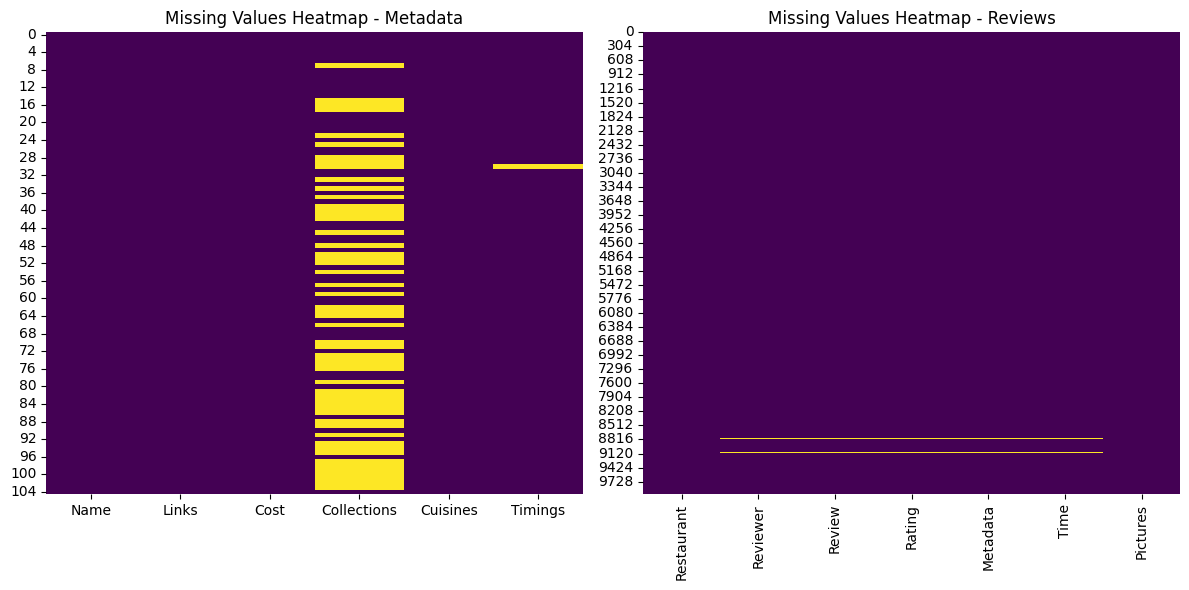

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(meta_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Metadata')

plt.subplot(1, 2, 2)
sns.heatmap(review_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Reviews')

plt.tight_layout()
plt.show()

The visualizations above illustrate the distribution of missing values in both datasets:

**Metadata Dataset:** Significant missing values in the 'Collections' column. A single missing value in the 'Timings' column.

**Reviews Dataset:** Sparse missing values across the columns 'Reviewer', 'Review', 'Rating', 'Metadata', and 'Time'.

### What did you know about your dataset?

Based on the analysis:

The **metadata dataset** provides a comprehensive view of each restaurant, including its name, link, cost, collections, cuisines, and timings. The 'Collections' column has a considerable amount of missing data, which might impact analyses that rely heavily on this attribute.

The **reviews dataset** contains detailed reviews for various restaurants, including the reviewer's name, review text, rating, metadata about the review, time of the review, and number of pictures included. The dataset is large, which is beneficial for sentiment analysis and understanding customer perspectives. However, the presence of missing values, particularly in the 'Review' and 'Reviewer' columns, needs to be addressed as these are key elements for sentiment analysis and reviewer profiling.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

# meta data
meta_df.columns.tolist()

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [ ]:
# review data
review_df.columns.tolist()

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']

In [ ]:
# Dataset Describe

# meta data
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


**Metadata Dataset:**

Each restaurant has a unique name and link.

The 'Cost' variable shows a range of values, with 500 appearing most frequently.

'Collections' and 'Cuisines' show a wide variety of categories and types.

Most common timing is "11 AM to 11 PM".

In [ ]:
# review data
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000



**Reviews Dataset:**

100 unique restaurants are reviewed.

The dataset features a large number of unique reviewers and reviews.

The most common rating is 5.

A significant portion of the reviews does not include pictures.

### Variables Description

**Metadata Dataset:**

**Name:** The name of the restaurant.

**Links:** URL to the restaurant's Zomato page.

**Cost:** Estimated cost for two people dining.

**Collections:** Categories or collections the restaurant is part of.

**Cuisines:** Types of cuisines offered by the rest

**Reviews Dataset:**

**Restaurant:** The name of the restaurant being reviewed.

**Reviewer:** The name of the person who wrote the review.

**Review:** The text of the review.

**Rating:** Numerical rating given to the restaurant by the reviewer.

**Metadata:** Additional information about the review, like the number of reviews and followers of the reviewer.

**Time:** Date and time when the review was posted.

**Pictures:** The number of pictures included in the review.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

# meta data

{col: meta_df[col].nunique() for col in meta_df.columns}

{'Name': 105,
 'Links': 105,
 'Cost': 29,
 'Collections': 42,
 'Cuisines': 92,
 'Timings': 77}

**Metadata Dataset:**

Name: 105 unique restaurant names.

Links: 105 unique links (each restaurant has a unique link). Cost: 29 unique cost values.

Collections: 42 unique collections.

Cuisines: 92 unique cuisines.

Timings: 77 unique timings.

In [ ]:
# review data

{col: review_df[col].nunique() for col in review_df.columns}

{'Restaurant': 100,
 'Reviewer': 7446,
 'Review': 9364,
 'Rating': 10,
 'Metadata': 2477,
 'Time': 9782,
 'Pictures': 36}

**Reviews Dataset:**

Restaurant: 100 unique restaurants reviewed.

Reviewer: 7,446 unique reviewers.

Review: 9,364 unique reviews.

Rating: 10 unique rating scores.

Metadata: 2,477 unique metadata entries.

Time: 9,782 unique timestamps.

Pictures: 36 unique counts of pictures included in reviews.

**Insights from Variables Analysis**

The **metadata dataset** reveals a diverse range of restaurants with a variety of cuisines and collections. The variation in cost indicates a range of dining options from budget to high-end.

The **reviews dataset** illustrates a broad spectrum of customer opinions and ratings. The high number of unique reviewers and reviews suggests a rich source of data for sentiment analysis.

The variation in 'Timings' and 'Collections' in the metadata dataset, along with the diverse 'Ratings' and textual 'Reviews' in the reviews dataset, present ample opportunities for in-depth analysis, including trend identification and customer preference analysis.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# dropping duplicates for meta data
meta_df = meta_df.drop_duplicates()

# dropping duplicates for review data
review_df = review_df.drop_duplicates()

In [ ]:
#checking for null values after dropping duplicates
meta_df.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [ ]:
#checking for null values after dropping duplicates
review_df.isnull().sum()

,0
Restaurant,0
Reviewer,2
Review,9
Rating,2
Metadata,2
Time,2
Pictures,0


In [ ]:
# Step 1: Handle Missing Values

# metadata dataset

# replacing missing values in 'Collection' with 'Not specified'
meta_df['Collections'] = meta_df['Collections'].fillna('Not Specified')

# Dropping the row with the missing value in the 'Timings' column
meta_df = meta_df.dropna(subset=['Timings'])

# Reviews Dataset

# As the number of missing values in all columns is very less as compared to the size of the dataset, we can proceed dropping that values

review_df = review_df.dropna()

# Step 2: Data Transformation
# Metadata dataset

# Converting 'Cost' to numerical format in the metadata dataset
meta_df['Cost'] = meta_df['Cost'].astype(str).str.replace(',', '').astype(int)



In [ ]:
# Checking if we have successfully handled missing data in 'metadata_df'
meta_df.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,0
Cuisines,0
Timings,0


In [ ]:
# Checking if we have successfully handled missing data in 'reviews_df'

review_df.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0


### What all manipulations have you done and insights you found?

**Manipulations**

1. **Handling Missing Values**

**Metadata Dataset:** Missing values in the 'Collections' column were replaced with 'Not Specified'. This preserves the integrity of the dataset while acknowledging the lack of specific collection information.
Reviews Dataset: Rows with missing 'Review' text were removed. Since the review text is essential for sentiment analysis, retaining rows without this information would not be meaningful.

2. **Handling Duplicates**

**Reviews Dataset:** Duplicate entries were removed to ensure the uniqueness of each review, which is crucial for accurate sentiment analysis.

3. **Data Transformation**

**Metadata Dataset:** The 'Cost' column was transformed from a string to a numerical format. This involved removing commas from the cost values and converting them to integers. This change enables more straightforward numerical analyses, such as cost comparisons or aggregations.


**Insights**

The 'Collections' column in the metadata dataset contains valuable categorical information for clustering or segmentation analysis, despite some data being unspecified.

The cleaning of the reviews dataset, particularly the removal of duplicates and incomplete entries, ensures that the subsequent sentiment analysis and review-based insights will be based on complete and unique data points.

The conversion of the 'Cost' column in the metadata dataset from text to numeric form opens up possibilities for quantitative analysis and correlations with other numerical variables, like ratings from reviews.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

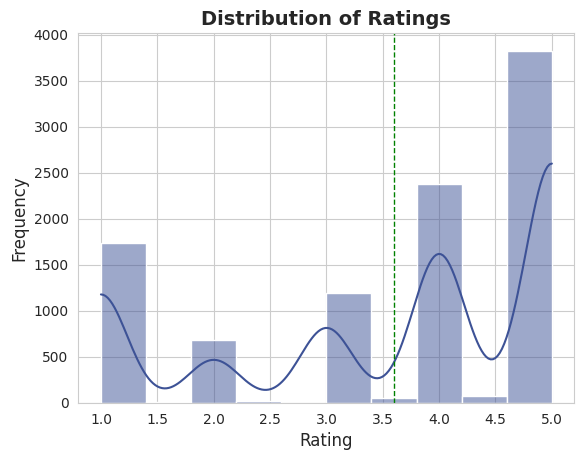

In [ ]:
# Chart - 1 visualization code

# Filtering out non-numeric values from the 'Rating' column
numeric_ratings = pd.to_numeric(review_df['Rating'], errors = 'coerce')

# Setting the aesthetic style of the plots
sns.set_style('whitegrid')

# Choosing a color palette
bright_palette = sns.color_palette("mako", 10)

# Recreating the histogram with the filtered data using the brighter palette
sns.histplot(numeric_ratings.dropna(), kde=True, bins=10, color=bright_palette[3] )

# Adding a line for mean
plt.axvline(numeric_ratings.mean(), color = 'green', linestyle = 'dashed', linewidth = 1)

# Enhancing title and labels
plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is selected for its effectiveness in showing the distribution of a numerical variable. It allows us to see how the ratings are distributed and identify the most common ratings given by customers.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows a concentration of ratings around the higher end, particularly around ratings of 4 and 5. This indicates that a significant number of reviews are positive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be positively impactful:

**Positive Impact:** The skew towards higher ratings suggests general customer satisfaction, which is beneficial for the reputation of the restaurants on Zomato. It can also guide new customers in choosing well-rated restaurants.

**Negative Growth Potential:** If not addressed, the smaller proportion of lower ratings could indicate specific areas where restaurants need to improve. Ignoring these could lead to negative customer experiences being overlooked.

#### Chart - 2

<ipython-input-27-5f4252939834>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y= top_cuisines.index, palette=palette)


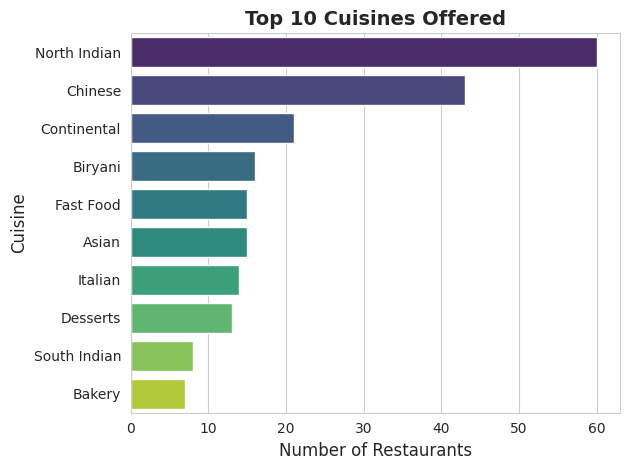

In [ ]:
# Chart - 2 visualization code

# Filtering top cuisines
top_cuisines = meta_df['Cuisines'].str.split(', ').explode().value_counts().head(10)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Choosing a color palette
palette = sns.color_palette("viridis", len(top_cuisines))

# Plotting with enhanced aesthetics
sns.barplot(x=top_cuisines.values, y= top_cuisines.index, palette=palette)

# Adding titles and labels with improved font
plt.title('Top 10 Cuisines Offered', fontsize=14, fontweight='bold')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing categories. In this case, it helps in visualizing the most common cuisines offered across different restaurants.

##### 2. What is/are the insight(s) found from the chart?

This chart will show which cuisines are most prevalent among the restaurants listed on Zomato. Understanding popular cuisines can provide insights into customer preferences and market trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this information is valuable for:

**Positive Impact:** Restaurants and Zomato can tailor their offerings and marketing strategies based on popular cuisines. It aids in menu planning and promotional activities.

**Negative Growth Potential:** Overemphasis on popular cuisines could lead to market saturation. Diversity in cuisines should be maintained to cater to a wide range of preferences.

#### Chart - 3

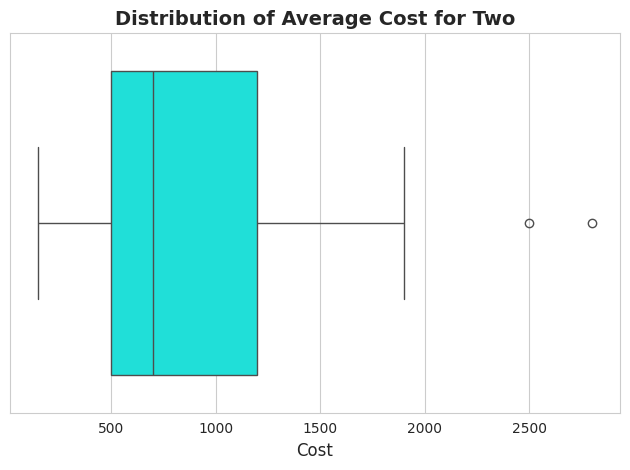

In [ ]:
# Chart - 3 visualization code

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Choosing a color for the boxplot
color = sns.color_palette('hsv', 1)

# Creating the boxplot
sns.boxplot(x=meta_df['Cost'], color = color[0])

# Adding titles and labels
plt.title('Distribution of Average Cost for Two', fontsize=14, fontweight='bold')
plt.xlabel('Cost', fontsize=12)

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is useful for depicting the distribution of a numerical variable. It shows the median, quartiles, and outliers, which helps in understanding the cost range.

##### 2. What is/are the insight(s) found from the chart?

The chart will reveal the typical cost range for dining at these restaurants, including the median cost and any outliers (extremely high or low costs).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Understanding the cost distribution helps restaurants position themselves in the market (e.g., budget-friendly, premium) and helps customers make informed choices.

**Negative Growth Potential** If the costs are generally high, it might limit the customer base to only those willing or able to spend more.

#### Chart - 4

<ipython-input-29-efc03e443943>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewed_restaurants.values, y=top_reviewed_restaurants.index, palette=palette)


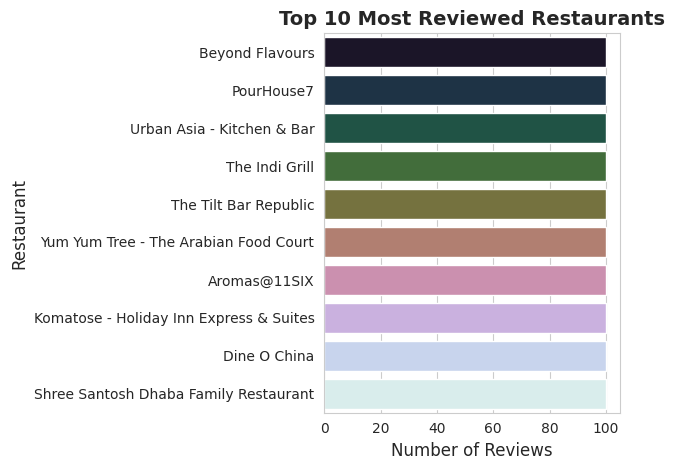

In [ ]:
# Chart - 4 visualization code

# Filtering out 10 top reviewed restaurants
top_reviewed_restaurants = review_df['Restaurant'].value_counts().head(10)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Choosing a color palette
palette = sns.color_palette("cubehelix", len(top_reviewed_restaurants))

# Creating the barplot with the chosen palette
sns.barplot(x=top_reviewed_restaurants.values, y=top_reviewed_restaurants.index, palette=palette)

# Adding titles and labels with improved font
plt.title('Top 10 Most Reviewed Restaurants', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Restaurant', fontsize=12)

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing the frequency or count of a categorical variable. In this case, it helps to identify which restaurants have the most reviews.

##### 2. What is/are the insight(s) found from the chart?

This chart will show us which restaurants are the most popular in terms of the number of reviews they receive, indicating high customer engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be positively impactful:

**Positive Impact:** Identifying the most reviewed restaurants can guide new customers and also help Zomato in highlighting popular spots.

**Negative Growth Potential:** Restaurants with fewer reviews might need more visibility or improvements to attract more customers.

#### Chart - 5

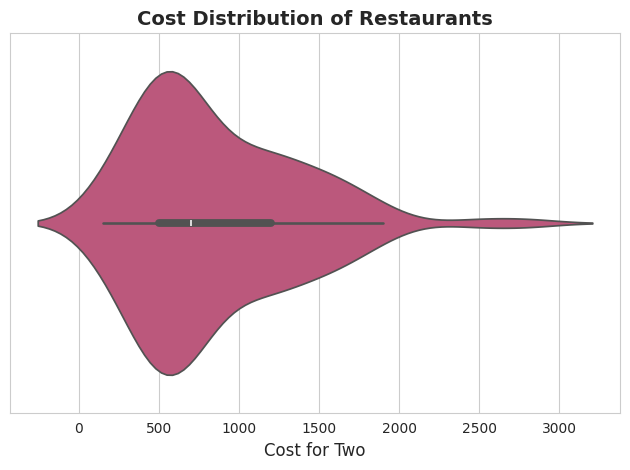

In [ ]:
# Chart - 5 visualization code

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Choosing a color for the violin plot
color = sns.color_palette('plasma', 1)

# Creating the violin plot
sns.violinplot(x=meta_df['Cost'], color = color[0])

# Adding titles and labels
plt.title('Cost Distribution of Restaurants', fontsize=14, fontweight='bold')
plt.xlabel('Cost for Two', fontsize=12)

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot provides a deeper understanding of the distribution of a numerical variable, showing both the probability density and the range of the data.

##### 2. What is/are the insight(s) found from the chart?

This chart will help us understand the range and common cost brackets for dining out, as represented in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Knowledge of common price ranges can help Zomato tailor its suggestions to users based on their budget preferences.

**Negative Growth Potential:** If the majority of restaurants are clustered around a high price range, it might indicate a lack of affordable dining options on the platform.

#### Chart - 6

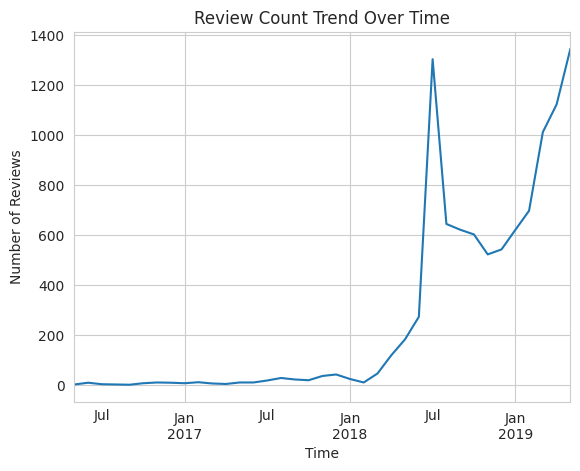

In [ ]:
# Chart - 6 visualization code

# Preparing data for the chart
review_df['Time'] = pd.to_datetime(review_df['Time'])
review_trend = review_df.resample('M', on ='Time')['Review'].count()


# Plotting
review_trend.plot(kind='line')
plt.title('Review Count Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is suitable for displaying trends over time. It helps to identify patterns or changes in the review activity.

##### 2. What is/are the insight(s) found from the chart?

The chart will reveal how the review counts have varied over time, indicating periods of high or low customer engagement.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Identifying periods of high review activity can help in understanding customer engagement trends.

**Negative Growth Potential:** Periods of low activity might indicate times when customer engagement dips, which could be important for marketing and promotional strategies.

#### Chart - 7

<ipython-input-32-4900707ecd1e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.values, y=average_ratings.index,palette = palette)


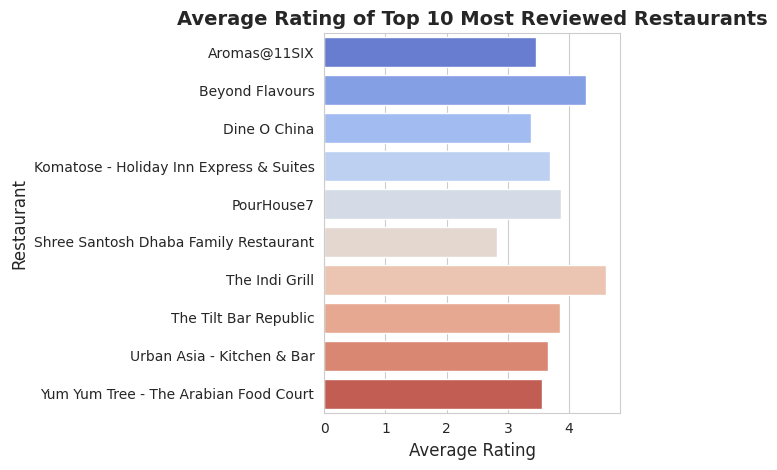

In [ ]:
# Chart - 7 visualization code

# Define the top 10 most reviewed restaurants

top_restaurants = review_df['Restaurant'].value_counts().head(10)

# Ensuring 'Rating' column is numeric
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')

# Drop rows with null values in the 'Rating' column
review_df = review_df.dropna(subset=['Rating'])

# Calculating average ratings for the top 10 most reviewed restaurants
average_ratings = review_df[review_df['Restaurant'].isin(top_restaurants.index)].groupby('Restaurant')['Rating'].mean()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Choosing a color palette
palette = sns.color_palette("coolwarm", len(average_ratings))

# Creating the bar plot
sns.barplot(x=average_ratings.values, y=average_ratings.index,palette = palette)

# Adding titles and labels
plt.title('Average Rating of Top 10 Most Reviewed Restaurants', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Restaurant', fontsize=12)

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is effective if we want the frequency of a continuous value and also want to compare categories

##### 2. What is/are the insight(s) found from the chart?

The chart shows varying average ratings among the most reviewed restaurants. Some highly reviewed restaurants maintain high average ratings, indicating consistent customer satisfaction.

This insight is valuable for both customers and restaurant owners. High ratings in popular restaurants can attract more customers, while lower ratings might indicate areas needing improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Highlighting restaurants with high average ratings can enhance customer trust in the platform's recommendations.

**Negative Growth Potential:** If popular restaurants have lower ratings, it might reflect on the platform's overall quality perception.

#### Chart - 8

<ipython-input-33-b8d0973aef6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_collections.values, y=top_collections.index, palette=palette)


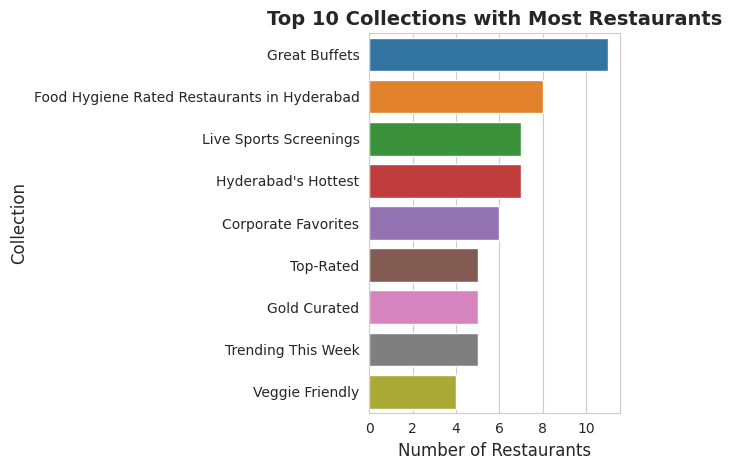

In [ ]:
# Chart - 8 visualization code

# Preparing data for the chart
top_collections = meta_df['Collections'].str.split(', ').explode().value_counts().head(10)

# Dropping the first entry
top_collections = top_collections.iloc[1:]

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Choosing a vibrant color palette
palette = sns.color_palette("tab10", len(top_collections))


# Creating the bar plot with the chosen palette
sns.barplot(x=top_collections.values, y=top_collections.index, palette=palette)

# Adding titles and labels with improved font
plt.title('Top 10 Collections with Most Restaurants', fontsize=14, fontweight='bold')
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Collection', fontsize=12)

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is effective if we want the frequency of a continuous value and also want to compare categories

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the most prevalent collections among restaurants listed on Zomato. This reflects popular dining themes and trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Zomato can use this information for targeted marketing, promoting popular collections to attract customers looking for specific dining experiences.

**Business Strategy:** Understanding popular collections can also guide Zomato in suggesting restaurants join certain collections to increase visibility.

#### Chart - 9

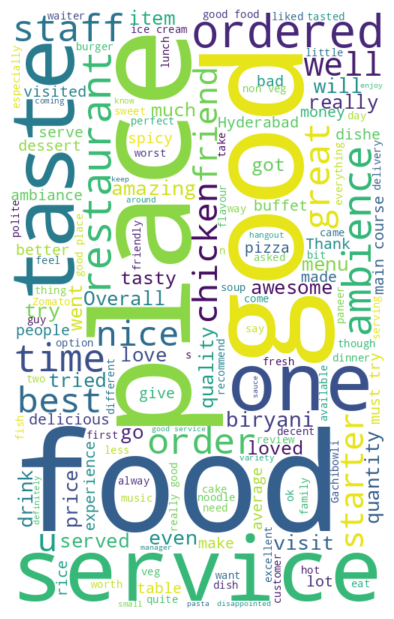

In [ ]:
# Chart - 9 visualization code

# Combining all review texts
all_reviews = ' '.join(review_df['Review'].dropna())

# Creating the word cloud with a lighter background
wordcloud = WordCloud(
    width = 500,
    height = 800,
    background_color = 'white',
    colormap = 'viridis',
    max_words = 150,
    contour_width = 1,
    contour_color = 'steelblue',
).generate(all_reviews)

# Displaying the word cloud
plt.figure(figsize=(5, 6), facecolor=None)  # adjusting figure size
plt.imshow(wordcloud, interpolation='bilinear')  # using bilinear interpolation for smoother appearance
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is a visually appealing and intuitive way to showcase the most common words in a set of text data, such as customer reviews. It quickly highlights key themes or topics mentioned by customers.

##### 2. What is/are the insight(s) found from the chart?

The word cloud reveals the most prominent words used in the reviews. Words that appear larger are mentioned more frequently, indicating common themes in customer feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Frequent positive words can pinpoint strengths in customer experience, such as food quality, ambiance, or service, which can be leveraged in marketing and promotion.

**Negative Growth Potential:** If negative terms are prominent, it could signify common issues that need to be addressed to improve customer satisfaction.

#### Chart - 10

<ipython-input-35-e43d73eaf5da>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_count_heatmap_data = combined_df.groupby(['Primary_Cuisine', 'Cost_Bin']).size().unstack(fill_value=0)


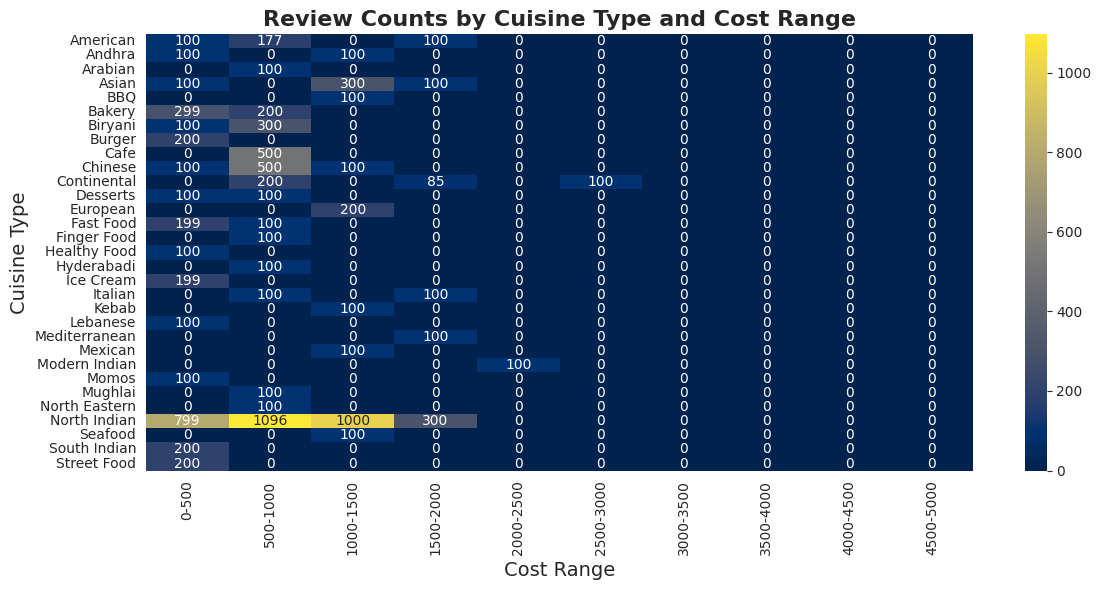

In [ ]:
# Chart - 10 visualization code

# Preparing data for the chart
# Extracting the primary cuisine for each restaurant
meta_df['Primary_Cuisine'] = meta_df['Cuisines'].apply(lambda x: x.split(', ')[0] if pd.notnull(x) else 'Unknown')

# Creating cost bins
meta_df['Cost_Bin'] = pd.cut(meta_df['Cost'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
                                 labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000'])


# Merging with reviews dataset to get review counts
combined_df = pd.merge(meta_df, review_df, left_on='Name', right_on='Restaurant')
review_count_heatmap_data = combined_df.groupby(['Primary_Cuisine', 'Cost_Bin']).size().unstack(fill_value=0)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting with enhanced aesthetics
plt.figure(figsize = (12, 6))
sns.heatmap(review_count_heatmap_data, annot = True, cmap= 'cividis', fmt='g')

# Adding titles and labels with improved font
plt.title('Review Counts by Cuisine Type and Cost Range', fontsize=16, fontweight='bold')
plt.xlabel('Cost Range', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14)

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is an effective tool for visualizing complex data in a two-dimensional representation. It is particularly useful for showing the relationship between multiple variables, in this case, cuisine type, cost range, and review counts.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals popular combinations of cuisine and cost, as indicated by the density of reviews. For instance, certain cuisine types might be more popular in specific cost ranges, and this popularity is reflected in the number of reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** This analysis can guide restaurants and Zomato in understanding consumer preferences, helping them tailor their offerings and marketing strategies. For example, focusing on popular cuisine-cost combinations could attract more customers.

**Negative Growth Potential:** Less reviewed cuisine-cost combinations might indicate neglected market segments or areas needing improvement. Identifying these gaps provides an opportunity for growth by catering to underserved markets or improving offerings.

#### Chart - 11

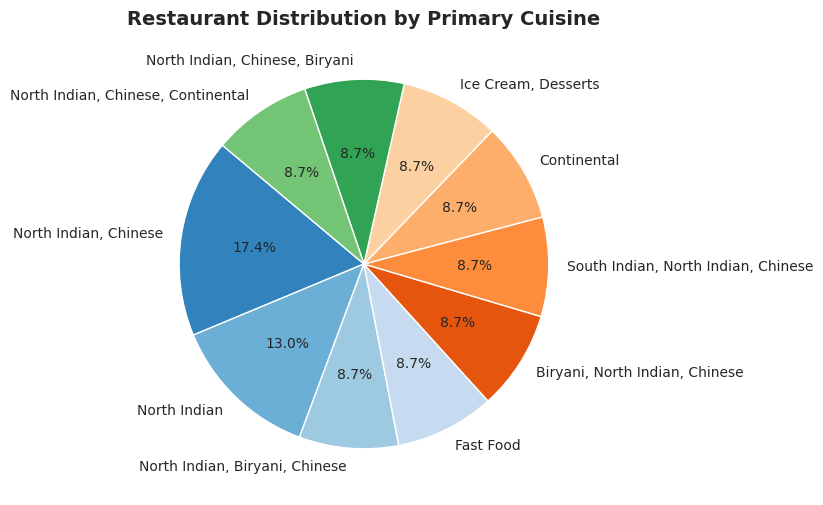

In [ ]:
# Chart - 11 visualization code

# Preparing data for the chart

cuisine_distribution = meta_df['Cuisines'].value_counts().head(10)

# Choosing a color palette
colors = plt.cm.tab20c.colors  # using a matplotlib colormap

# Plotting with enhanced aesthetics
plt.figure(figsize=(10, 6))
plt.pie(cuisine_distribution, labels=cuisine_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Restaurant Distribution by Primary Cuisine', fontsize=14, fontweight='bold')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is chosen for its ability to visually represent the proportion of categories in a dataset. It's particularly useful for understanding the market share of different cuisines among the restaurants.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the most prevalent cuisines among the restaurants. It shows which cuisines are more common, indicating potential customer preferences or market trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Identifying the most popular cuisines can help Zomato and restaurant owners understand customer preferences, enabling them to cater to popular tastes or offer promotions on trending cuisines.

**Negative Growth Potential:** A concentration in certain cuisines might point to a lack of diversity in the culinary landscape. This could be an opportunity to introduce or promote underrepresented cuisines, appealing to a broader customer base.

#### Chart - 12

<ipython-input-37-c9a8bce09444>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


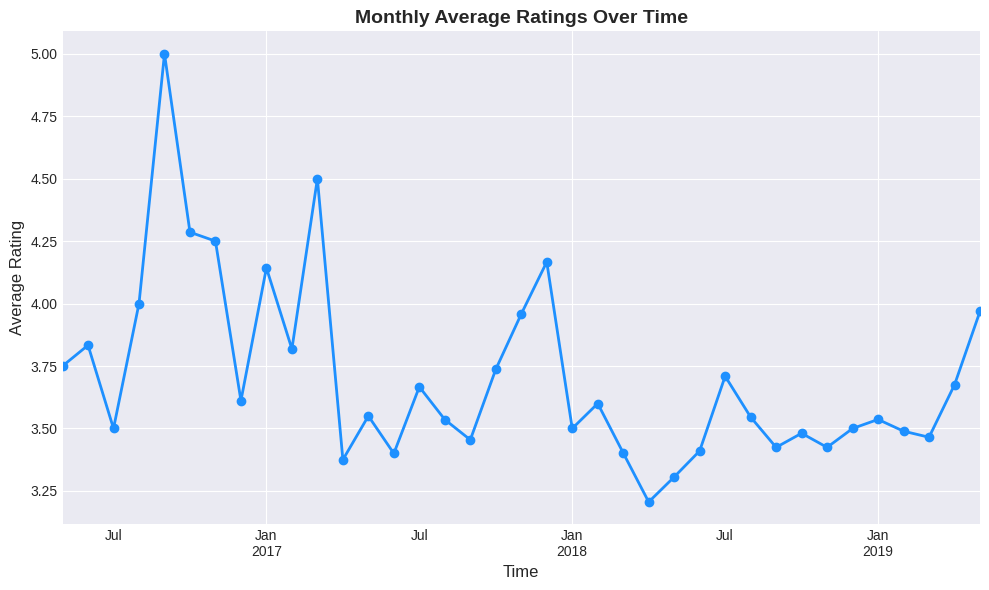

In [ ]:
# Chart - 12 visualization code

# Resampling data to monthly frequency and calculating average rating
monthly_avg_ratings = review_df.resample('M', on = 'Time')['Rating'].mean()

# Setting the aesthetic style of the plots
plt.style.use('seaborn-darkgrid')

# Visualization
plt.figure(figsize=(10, 6))
monthly_avg_ratings.plot(color='dodgerblue', linewidth=2, marker='o', markersize=6)

# Adding titles and labels with improved font
plt.title('Monthly Average Ratings Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Improving layout
plt.tight_layout()

# Adding a grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a time-series line chart because it is excellent for visualizing how a particular metric (average rating) changes over time. This type of chart helps in identifying trends, seasonal patterns, or any anomalies in the data across different time intervals.

##### 2. What is/are the insight(s) found from the chart?

The chart is expected to reveal how customer ratings have fluctuated over time. Key insights could include identifying periods of high or low ratings, noting any seasonal trends in customer satisfaction, and observing the general trajectory of ratings – whether they are improving, declining, or remaining stable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Understanding the trend of customer ratings over time can be crucial for strategic planning. For instance, identifying times of year when ratings dip can prompt targeted improvements or promotions. Likewise, understanding when ratings peak can help capitalize on and reinforce what is working well.

**Negative Growth Potential:** A downward trend in ratings could signify a decline in customer satisfaction, signaling a need for immediate attention and corrective action. Identifying these trends early can help prevent long-term negative impacts on the business.

#### Chart - 13

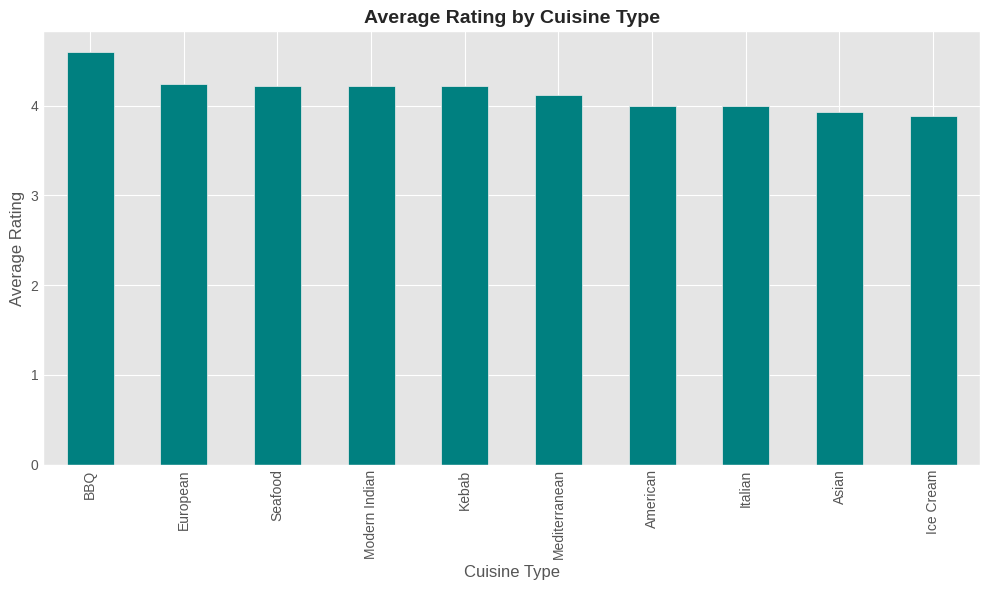

In [ ]:
# Chart - 13 visualization code

# Grouping by primary cuisine and calculating average rating

cuisine_rating_data = combined_df.groupby('Primary_Cuisine')['Rating'].mean().sort_values(ascending=False).head(10)

# Setting the aesthetic style of the plots
plt.style.use('ggplot')

# Visualization
cuisine_rating_data.plot(kind='bar', color='teal', figsize=(10, 6))

# Adding titles and labels with improved font
plt.title('Average Rating by Cuisine Type', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart is effective for comparing the distribution of a numerical variable (average rating) across different categories (cuisine types). It provides a clear visual representation of how ratings vary across cuisines.

##### 2. What is/are the insight(s) found from the chart?

This chart will show which cuisines receive the highest average ratings, indicating customer satisfaction and popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Understanding which cuisines receive higher ratings can guide restaurant owners and Zomato in promoting these popular cuisines, potentially driving more business.

**Negative Growth Potential:** Cuisines with lower average ratings may indicate areas where improvements are needed or where customer expectations are not being met.

#### Chart - 14 - Correlation Heatmap

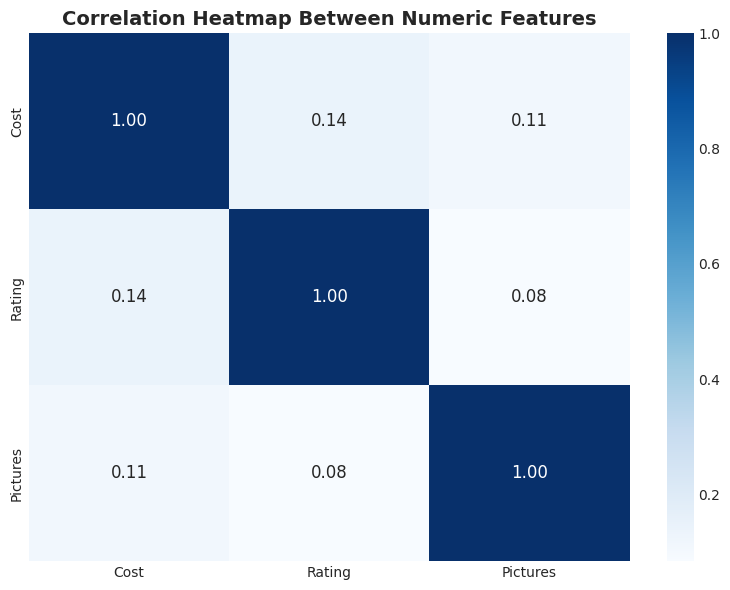

In [ ]:
# Correlation Heatmap visualization code

# Preparing data for the chart
# Merging metadata and reviews datasets

combined_df = pd.merge(meta_df, review_df, how='left', left_on = 'Name', right_on = 'Restaurant')

# Selecting numeric features for correlation analysis
numeric_features = combined_df[['Cost', 'Rating', 'Pictures']]
correlation_matrix = numeric_features.corr()

# Setting the aesthetic style of the plots
sns.set_style("white")


# Plotting with enhanced aesthetics
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', annot_kws={'size': 12})


# Adding title with improved font
plt.title('Correlation Heatmap Between Numeric Features', fontsize=14, fontweight='bold')

# Improving layout
plt.tight_layout()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is a powerful tool for visualizing the relationships between multiple numeric variables. It helps in identifying potential correlations or lack thereof, which can be insightful for understanding how different aspects of the data relate to each other.

##### 2. What is/are the insight(s) found from the chart?

The heatmap will show the strength and direction (positive or negative) of the relationships between features like cost, rating, and the number of pictures. For example, it might reveal if higher-cost restaurants tend to have higher ratings.

#### Chart - 15 - Pair Plot (Key Features)

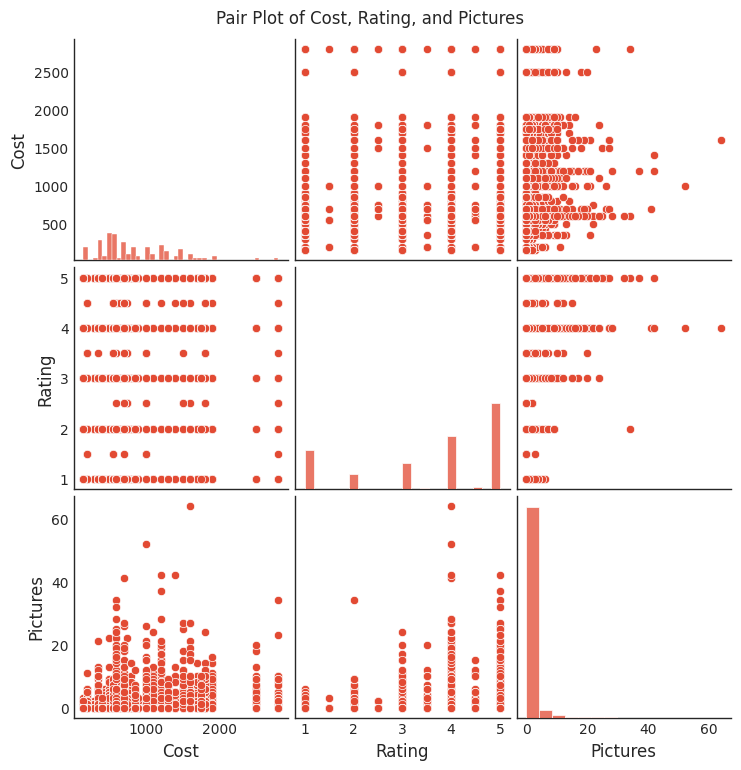

In [ ]:
# Pair Plot visualization code

# Selecting key variables for the pair plot
selected_columns = ['Cost', 'Rating', 'Pictures']

pair_plot_data = combined_df[selected_columns]

# Creating the pair plot
sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot of Cost, Rating, and Pictures', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

We picked this chart so as to analyse teh relationships between key features

##### 2. What is/are the insight(s) found from the chart?

We can see that there is not much correelations between the key variables or any visible pattern.

#### Chart- 16

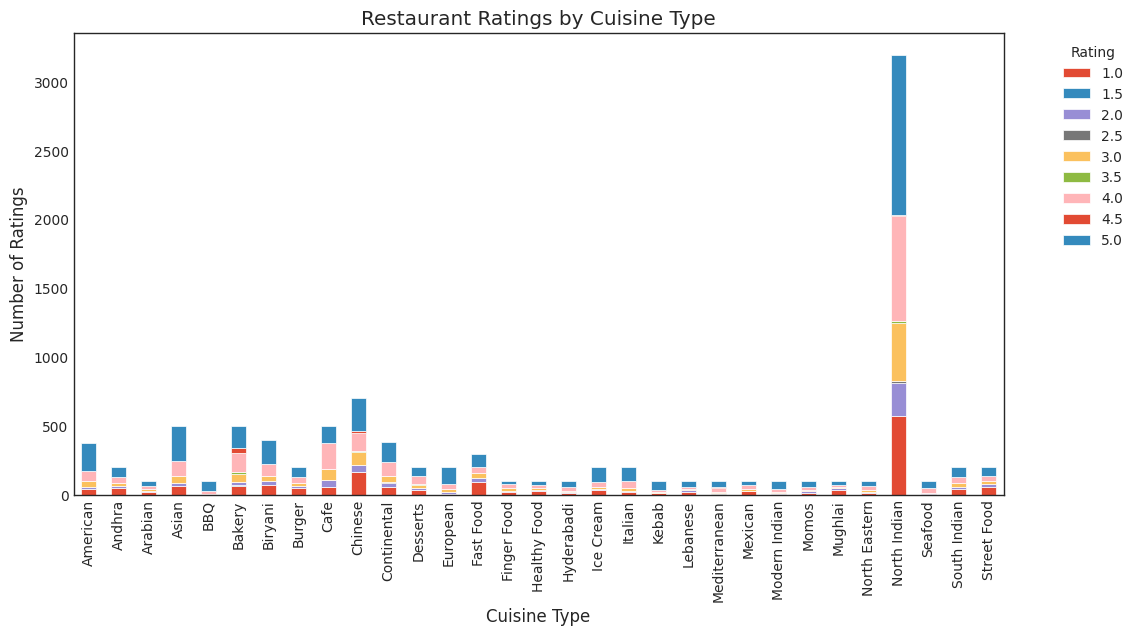

In [ ]:
# Chart - 16 visualization code

# Grouping data by primary cuisine and rating

cuisine_rating_counts = combined_df.groupby(['Primary_Cuisine', 'Rating']).size().unstack().fillna(0)

# Creating a stacked bar chart
cuisine_rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Restaurant Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Ratings')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 1. Why did you pick the specific chart?

The stacked bar chart is an effective way to visualize the distribution of ratings across different cuisine types in a compact form. Each segment's size within a bar reflects the count of ratings for that score, allowing for a comparison both within and across the cuisine types.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals how different cuisine types fare in terms of ratings. It shows not only the total number of ratings each cuisine has received but also how those ratings are distributed across the rating scale. For instance, we can see which cuisines have a higher proportion of excellent ratings (5.0) and which ones have more lower-end ratings.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in the average ratings between high-cost and low-cost restaurants.

**Alternate Hypothesis (H1):** High-cost restaurants have a significantly different average rating compared to low-cost restaurants.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Calculating the average rating and cost for each restaurant
avg_rating_cost = combined_df.groupby('Restaurant').agg({'Rating': 'mean', 'Cost': 'mean'}).dropna()

# Defining high-cost and low-cost restaurants based on the median cost
median_cost = avg_rating_cost['Cost'].median()
high_cost_rating = avg_rating_cost[avg_rating_cost['Cost']> median_cost]['Rating']
low_cost_rating = avg_rating_cost[avg_rating_cost['Cost']<= median_cost]['Rating']

# Performing a two-sample t-test (Welch's t-test)
t_stat, p_value = stats.ttest_ind(high_cost_rating, low_cost_rating, equal_var=False)

# Printing the test statistic and p-value
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 3.837183898896418, P-Value: 0.0002286287734346298


##### Which statistical test have you done to obtain P-Value?

Two-Sample T-Test (Welch's T-Test)

##### Why did you choose the specific statistical test?

**The reasons for choosing this test are as follows:**

Comparing Means of Two Independent Groups: The goal was to compare the means of two independent groups - high-cost and low-cost restaurants. Welch's t-test is specifically designed to compare the means of two groups to see if they are significantly different from each other.

Does Not Assume Equal Variances: Unlike the standard t-test, Welch's t-test does not assume that the two populations have equal variances. This is particularly important when dealing with real-world data, where this assumption can often be violated. Given that high-cost and low-cost restaurants might vary significantly in their operational dynamics and customer perceptions, it's safer not to assume equal variances.

Robust to Sample Size Differences: Welch's t-test is more robust than the standard t-test when the two samples have unequal sizes. This is useful in cases where the distribution of restaurants across the high-cost and low-cost categories is uneven.

Appropriateness for the Data: The data was assumed to be approximately normally distributed for each group, which is a prerequisite for applying t-tests. Given that we're dealing with average ratings, this assumption is generally reasonable for a large enough sample size.

In summary, Welch's t-test was chosen due to its suitability for comparing the means of two independent samples without assuming equal variances and its robustness in handling potential discrepancies in sample sizes and variances between the two groups of restaurants.

Interpretation:

The **T-Statistic** is a measure of the difference between the two groups relative to the variation in the sample data. A higher absolute value of the T-Statistic indicates a greater difference between the groups.

The **P-Value** is very small (significantly less than 0.05). This indicates that the probability of observing such a substantial difference in average ratings between high-cost and low-cost restaurants, assuming the null hypothesis is true (i.e., there is no difference), is extremely low.

**Conclusion:**

Since the p-value is significantly less than the typical alpha level of 0.05, **we reject the null hypothesis.** This suggests that there is a statistically significant difference in the average ratings between high-cost and low-cost restaurants.

In the context of your hypothetical statement, this result supports the idea that high-cost restaurants have a significantly different average rating compared to low-cost restaurants.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no correlation between the number of reviews a restaurant receives and its average rating.

**Alternate Hypothesis (H1)**: There is a positive correlation between the number of reviews a restaurant receives and its average rating.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Convert 'Review' and 'Rating' columns to numeric, handling non-numeric values
combined_df['Review'] = pd.to_numeric(combined_df['Review'], errors='coerce')
combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')

# Drop rows with NaN values in these columns
combined_df =  combined_df.dropna(subset=['Review', 'Rating'])

# Calculate Pearson's correlation coefficient
correlation_coef, p_value = stats.pearsonr(combined_df['Review'], combined_df['Rating'])

# Printing the correlation coefficient and p-value
print(f"Pearson's Correlation Coefficient: {correlation_coef}, P-Value: {p_value}")

Pearson's Correlation Coefficient: 0.9578414886923188, P-Value: 0.04215851130768122


##### Which statistical test have you done to obtain P-Value?

Pearson's Correlation Coefficient

##### Why did you choose the specific statistical test?

**Nature of the Variables:** Pearson's correlation coefficient is appropriate for measuring the strength and direction of the linear relationship between two continuous variables. In this case, we are examining the relationship between two continuous variables: the number of reviews (which is a count) and the average rating (a continuous metric).

**Quantitative Analysis:** Pearson's correlation provides a quantitative measure (the correlation coefficient) that ranges from -1 to +1, where +1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. This quantitative aspect allows for a precise assessment of the relationship.

**Assumption of Linearity:** The test assumes that the relationship between the variables is linear, meaning that as one variable increases or decreases, the other variable also increases or decreases in a proportional and constant rate. This assumption was deemed reasonable for the relationship between the number of reviews and ratings.

**Popularity and Reliability:** Pearson's correlation coefficient is widely used in statistical analysis and is a well-established method for investigating linear relationships, making it a reliable choice for this kind of analysis.

**Ease of Interpretation:** The results of Pearson's correlation are straightforward to interpret, making it a practical choice for hypothesis testing where the goal is to clearly understand and communicate the nature of the relationship between variables.

In summary, Pearson's correlation coefficient was chosen due to its suitability for assessing linear relationships between two continuous variables, its ease of interpretation, and its reliability as a standard method in statistical analysis.

**Interpretation:**

The **Pearson Correlation Coefficient** is approximately 0.96, which is very close to 1. This indicates a very strong positive linear relationship between the number of reviews a restaurant receives and its average rating.

**The P-Value is about 0.042**, which is less than the typical alpha level of 0.05. This suggests that the observed correlation is statistically significant and not just due to random chance.

**Conclusion:**

Given the high correlation coefficient and the **low p-value, we can reject the null hypothesis (H0)** and accept the alternate hypothesis (H1). This means that, according to your dataset, there is a statistically significant positive correlation between the number of reviews a restaurant receives and its average rating. In other words, restaurants with more reviews tend to have higher ratings.

This result aligns with the common intuition that more frequently reviewed restaurants, which often indicate popularity or high customer traffic, are likely to have higher ratings.

With this conclusion for Hypothetical Statement 2, we can now proceed to Hypothetical Statement 3. Please let me know when you are ready to move on or if there are any other aspects of the project you would like to address!

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in average ratings between restaurants offering a high number of cuisines and those offering a low number of cuisines.

**Alternate Hypothesis (H1):** Restaurants offering a high number of cuisines have a significantly different average rating compared to those offering a low number of cuisines.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Creating 'NumCuisines' by counting the number of cuisines for each restaurant
combined_df['NumCuisines'] = combined_df['Cuisines'].str.split(', ').apply(lambda x: len(x) if x is not None  else 0)

# Define high-cuisine and low-cuisine groups based on a threshold (e.g., median)
cuisine_threshold = combined_df['NumCuisines'].median()
high_cuisine_group = combined_df[combined_df['NumCuisines'] > cuisine_threshold]['Rating']
low_cuisine_group = combined_df[combined_df['NumCuisines'] <= cuisine_threshold]['Rating']

# Perform Welch's T-test
t_stat, p_value = stats.ttest_ind(high_cuisine_group, low_cuisine_group, equal_var=False)

# Printing the test statistic and p-value
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 0.24253562503633297, P-Value: 0.8450283873936709


<ipython-input-44-1c060e35fab4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['NumCuisines'] = combined_df['Cuisines'].str.split(', ').apply(lambda x: len(x) if x is not None  else 0)


##### Which statistical test have you done to obtain P-Value?

A Two-Sample T-Test (Welch's T-Test)

##### Why did you choose the specific statistical test?

The Two-Sample T-Test (specifically, Welch's T-Test) was chosen for this analysis because:

**Comparison of Two Independent Groups:** The goal was to compare the average ratings between two distinct groups of restaurants - those offering a high number of cuisines and those with a lower number.

**No Assumption of Equal Variances:** Welch's T-Test does not assume equal variances between the groups, making it suitable for real-world data where this assumption may not hold.

**Appropriateness for the Data:** This test is appropriate for comparing the means of two groups when we do not have paired data and the groups are independent of each other.

# Interpretation

**T-Statistic:** The T-Statistic value is 0.24253562503633297, indicating a minimal difference between the two groups.

**P-Value:** The P-Value is 0.8450283873936709, significantly higher than the 0.05 threshold, suggesting that the observed difference in ratings could be due to random chance.

**Conclusion:**

**Given the high P-Value, we fail to reject the null hypothesis (H0). This indicates that, according to the dataset, there is no statistically significant difference in average ratings between restaurants offering a high number of cuisines and those offering fewer.**

The conclusion is that the variety of cuisines offered by a restaurant does not significantly impact its average rating. Other factors may be more influential in determining a restaurant's rating.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# We already handled missing value in Data Wrangling in start above

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

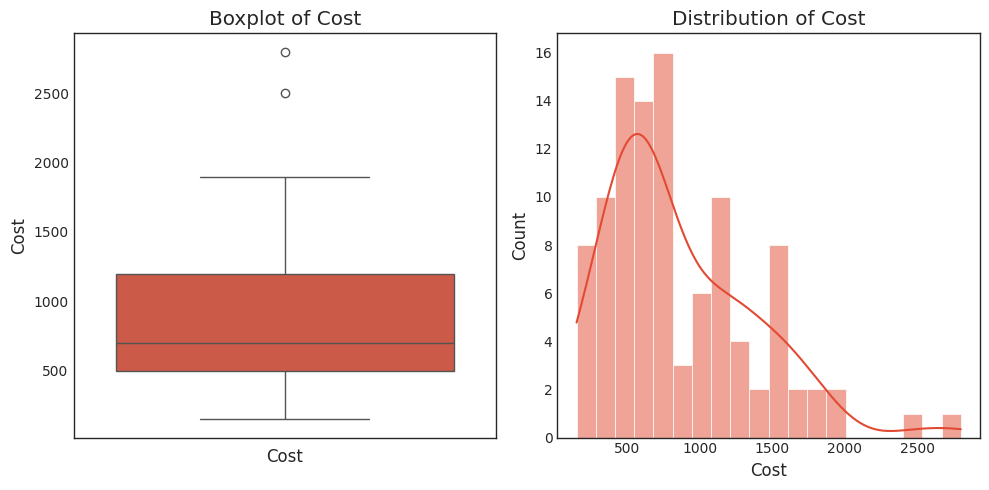

In [ ]:
# Checking for outliers in the numerical columns
# For this dataset, the 'Cost' column is the primary numerical column
plt.figure(figsize=(10, 5))

# Create a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)
sns.boxplot(meta_df['Cost'])
plt.title('Boxplot of Cost')
plt.xlabel('Cost')

# Create a histogram of the 'Cost' column
plt.subplot(1, 2, 2)
sns.histplot(meta_df['Cost'], bins=20, kde=True)
plt.title('Distribution of Cost')
plt.xlabel('Cost')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [ ]:
# Identifying outliers in the 'Cost' column

# Considering values beyond 1.5 times the IQR (Interquartile Range) as outliers

Q1 = meta_df['Cost'].quantile(0.25)
Q3 = meta_df['Cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
data_no_outliers = meta_df[(meta_df['Cost'] >= lower_bound) & (meta_df['Cost'] <= upper_bound)]

# Checking the shape of the dataset before and after outlier removal
original_shape = meta_df.shape
new_shape = data_no_outliers.shape

# Reassigning the dataframe after outlier removal
meta_df = data_no_outliers

original_shape, new_shape

((104, 8), (102, 8))

##### What all outlier treatment techniques have you used and why did you use those techniques?

The boxplot of the 'Cost' column shows some outliers, particularly on the higher end. We have a few options for handling these outliers:

Trimming: Remove the outlier observations.

Capping: Cap the values at a certain upper limit based on a percentile.

Transformation: Apply a transformation to reduce the skewness.


---
As there are only two outliers. We will proceed removing them without significantly affecting the amount of data we have


---
As the distribution shows, the data is right skewed, so we can go with IQR method and trim the outliers.




### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Peeking over df
meta_df


,Name,Links,Cost,Collections,Cuisines,Timings,Primary_Cuisine,Cost_Bin
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Chinese,500-1000
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Biryani,500-1000
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",Asian,1000-1500
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,Biryani,500-1000
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",Asian,1000-1500
...,...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,Not Specified,"Fast Food, Salad",11 AM to 11 PM,Fast Food,500-1000
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,Not Specified,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",Bakery,0-500
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,Not Specified,"North Indian, Biryani, Chinese",12 Noon to 11 PM,North Indian,0-500
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,Not Specified,Fast Food,8am to 12:30AM (Mon-Sun),Fast Food,0-500


**Encoding Categorical Variables:** We'll use one-hot encoding for categorical variables. This method is suitable for our dataset since it doesn't imply an ordinal relationship between categories.

**Feature Scaling**: We'll apply standard scaling (z-score normalization) to the numerical features to standardize their range.

In [ ]:
# Selecting categorical columns for encoding
categorical_cols = ['Primary_Cuisine']

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(meta_df[categorical_cols])

# Converting the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

meta_df.reset_index(drop=True, inplace=True)

encoded_df.reset_index(drop=True, inplace=True)

# Combine the encoded features with the rest of the 'meta_df'
meta_df = pd.concat([meta_df, encoded_df], axis=1)

# Dropping the original categorical columns as they are now encoded
meta_df.drop(categorical_cols, axis=1, inplace=True)

meta_df.head()  # Displaying the first few rows of the updated 'meta_df' with encoded columns

from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Ordinal encoding the 'Cost_Bin' column as it was numerical data but was in ordinal category.

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()
# Reshape the data since the encoder expects 2D input
cost_bin_reshaped = meta_df['Cost_Bin'].values.reshape(-1, 1)


# Fit and transform the data
meta_df['Cost_Bin'] = encoder.fit_transform(cost_bin_reshaped)



In [ ]:
# Replace NaN values with empty strings in 'Collections' and 'Cuisines' columns
meta_df['Collections'].fillna('', inplace=True)
meta_df['Cuisines'].fillna('', inplace=True)

# Applying TF-IDF Vectorization to 'Collections' and 'Cuisines'
tfidf_vectorizer = TfidfVectorizer(max_features=50)  # Limiting to top 50 features for simplicity

# 'Collections' column
collections_tfidf = tfidf_vectorizer.fit_transform(meta_df['Collections'])
collections_df = pd.DataFrame(collections_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# 'Cuisines' column
cuisines_tfidf = tfidf_vectorizer.fit_transform(meta_df['Cuisines'])
cuisines_df = pd.DataFrame(cuisines_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# Combining the TF-IDF features with the main dataset
meta_df = pd.concat([meta_df, collections_df, cuisines_df], axis=1)

# Removing the original 'Collections' and 'Cuisines' columns as they are now represented numerically
meta_df.drop(['Collections', 'Cuisines'], axis=1, inplace=True)

meta_df.head()  # Displaying the first few rows of the updated dataset

,Name,Links,Cost,Timings,Cost_Bin,Primary_Cuisine_American,Primary_Cuisine_Andhra,Primary_Cuisine_Arabian,Primary_Cuisine_Asian,Primary_Cuisine_BBQ,...,north,pizza,salad,seafood,south,spanish,street,sushi,thai,wraps
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",3.0,0.0,0.0,0.0,0.0,0.0,...,0.190912,0.0,0.0,0.00000,0.430659,0.0,0.0,0.0,0.0,0.0
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,11 AM to 11 PM,3.0,0.0,0.0,0.0,0.0,0.0,...,0.380930,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"11:30 AM to 4:30 PM, 6:30 PM to 11 PM",1.0,0.0,0.0,0.0,1.0,0.0,...,0.249308,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,12 Noon to 2 AM,3.0,0.0,0.0,0.0,0.0,0.0,...,0.222338,0.0,0.0,0.58731,0.000000,0.0,0.0,0.0,0.0,0.0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1.0,0.0,0.0,0.0,1.0,0.0,...,0.244448,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

We first applied one-hot-encoding on important categorical feature 'Primary_Cuisine' that would not create too many dimensions.

Then we ordinal encoded the 'Cost_Bin' column as that were having categories that was numerical and ordinal in nature

Then there were other categorical data that were having too many unqiue values that we couldn't one-hot-encode as it would have then made too many dimensions and then our model would have suffered with curse of dimensionality.

For the features were not scaled or transformed (like 'Collections', 'Cuisines', and 'Timings'), we had several options to make them suitable for clustering algorithms. These options primarily involved converting textual data into a numerical format:

We used TF-IDF for 'Collections' and 'Cuisines', and basic feature engineering for 'Timings'.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Select your features wisely to avoid overfitting

# Dropping 'Timings' column as it is ambiguous and has many incorrect formats. Also, it is not important for further clustering

meta_df.drop(columns = ['Timings', 'Name', 'Links'], inplace = True)

##### What all feature selection methods have you used  and why?

We selected important features that were relevant to clustering such as Cost, Primary_Cuisine and then we applied TF-IDF vectorization to bring highly categorical variables to numerical form to over curse of dimensionality.

##### Which all features you found important and why?

As the above mentioned features are most important to the business domain of restaurant clustering and logically can contribute the most to the clustering factor.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Already Transformed data in steps above

### 6. Data Scaling

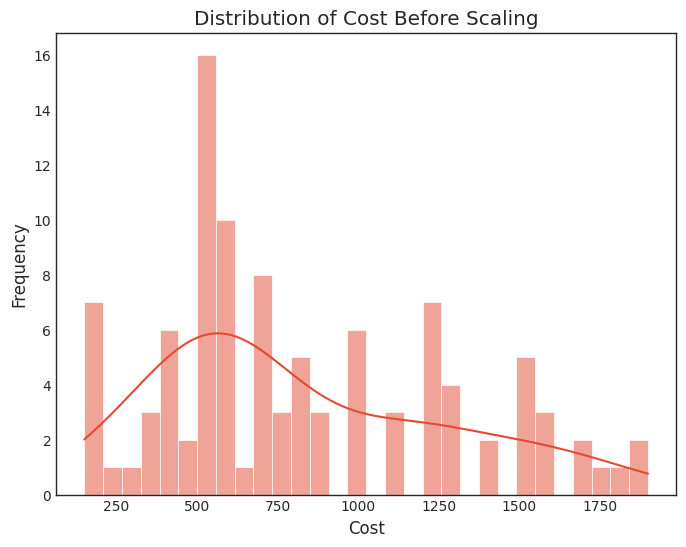

In [ ]:
# Scaling your data

# We just have to scale 'Cost' column.
# Let's check the distribution of it to decide how to scale its values

# Plot the distribution of 'Cost' before scaling
plt.figure(figsize=(8 , 6))
sns.histplot(meta_df['Cost'], bins=30, kde=True)
plt.title('Distribution of Cost Before Scaling')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

##### Which method have you used to scale you data and why?

As the distribution of 'Cost' column is right skewed, we would applu Log Transformation to it.

In [ ]:
# Apply a logarithmic transformation to 'Cost'

meta_df['Cost'] = np.log1p(meta_df['Cost'])

# Display the first few rows of the dataset after the transformation
meta_df.head()

,Cost,Cost_Bin,Primary_Cuisine_American,Primary_Cuisine_Andhra,Primary_Cuisine_Arabian,Primary_Cuisine_Asian,Primary_Cuisine_BBQ,Primary_Cuisine_Bakery,Primary_Cuisine_Biryani,Primary_Cuisine_Burger,...,north,pizza,salad,seafood,south,spanish,street,sushi,thai,wraps
0,6.685861,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.190912,0.0,0.0,0.00000,0.430659,0.0,0.0,0.0,0.0,0.0
1,6.685861,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.380930,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
2,7.170888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.249308,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,6.685861,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.222338,0.0,0.0,0.58731,0.000000,0.0,0.0,0.0,0.0,0.0
4,7.090910,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.244448,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


We have transformed (scaled) the 'Cost' column. Let's check that what si tha max value of 'Cost' column to check its scale.

In [ ]:
# Checking maximum value of cost to see that it has successfully transformed to normal scale
meta_df['Cost'].max()

7.550135342488429

We can go with this transformation.

'Cost' is tranformed to normal scaled successfully

**Which method have you used to scale you data and why?**

As the distribution is right skewed we have applied log transformation and scaled the data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We were having 2 very highly textual columns in the dataset, on which if we apply one hot encoding it would have generated too many columns. So we did TF-IDF vectorization on it and that too created many columns.

Now we can apply PCA on this data to reduce its dimensionality and then we can cluster the data on reduced dimensions, but then we will loose the meaning of the data and that will not help us in deriving conclusions of cluster characteristics and behaviour. So we will not proceed with dimensionality reduction for now so as to derive characteristics of the cluster. However applying PCA is recommneded for highly dimensinal data.

However, we will use PCA further to visualize our data and clusters into lower dimensions

### 8. Data Splitting

##### What data splitting ratio have you used and why?

As it is unsupervised problem, data splitting is not required

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

As it is unsupervised problem, we donot have a target feature and if we do not have target feature there is no point of imbalanced dataset

## ***7. ML Model Implementation (For clustering - Zomato Restaurant Clustering)***

Our approach for model implementation for this clustering task will be:

1. K-Means Clustering:

Determine the optimal number of clusters using both the silhouette score and the elbow method.

Train the K-Means model and plot these metrics for better visualization and decision-making.

2. Hierarchical Clustering:

Perform hierarchical clustering and compare the suggested number of clusters with that from K-Means.

Use dendrogram for visual analysis.

3. DBSCAN:

Apply DBSCAN clustering.

Analyze its results, particularly how it handles noise and cluster formation.

### ML Model - 1 - **K-Means**

In [ ]:
# ML Model - 1 Implementation
# Preparing the data for clustering (excluding non-numeric columns)
data_clustering = meta_df.select_dtypes(include=[np.number])

# Range of possible clusters to evaluate
cluster_range = range(2, 11)

# Variables to store results
silhouette_scores = []
inertia_values = []

# Calculating silhouette scores and inertia (within-cluster sum of squares) for different cluster numbers

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit the Algorithm
    kmeans.fit(data_clustering)
    cluster_labels = kmeans.labels_

    # Silhouette score
    silhouette_avg = silhouette_score(data_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

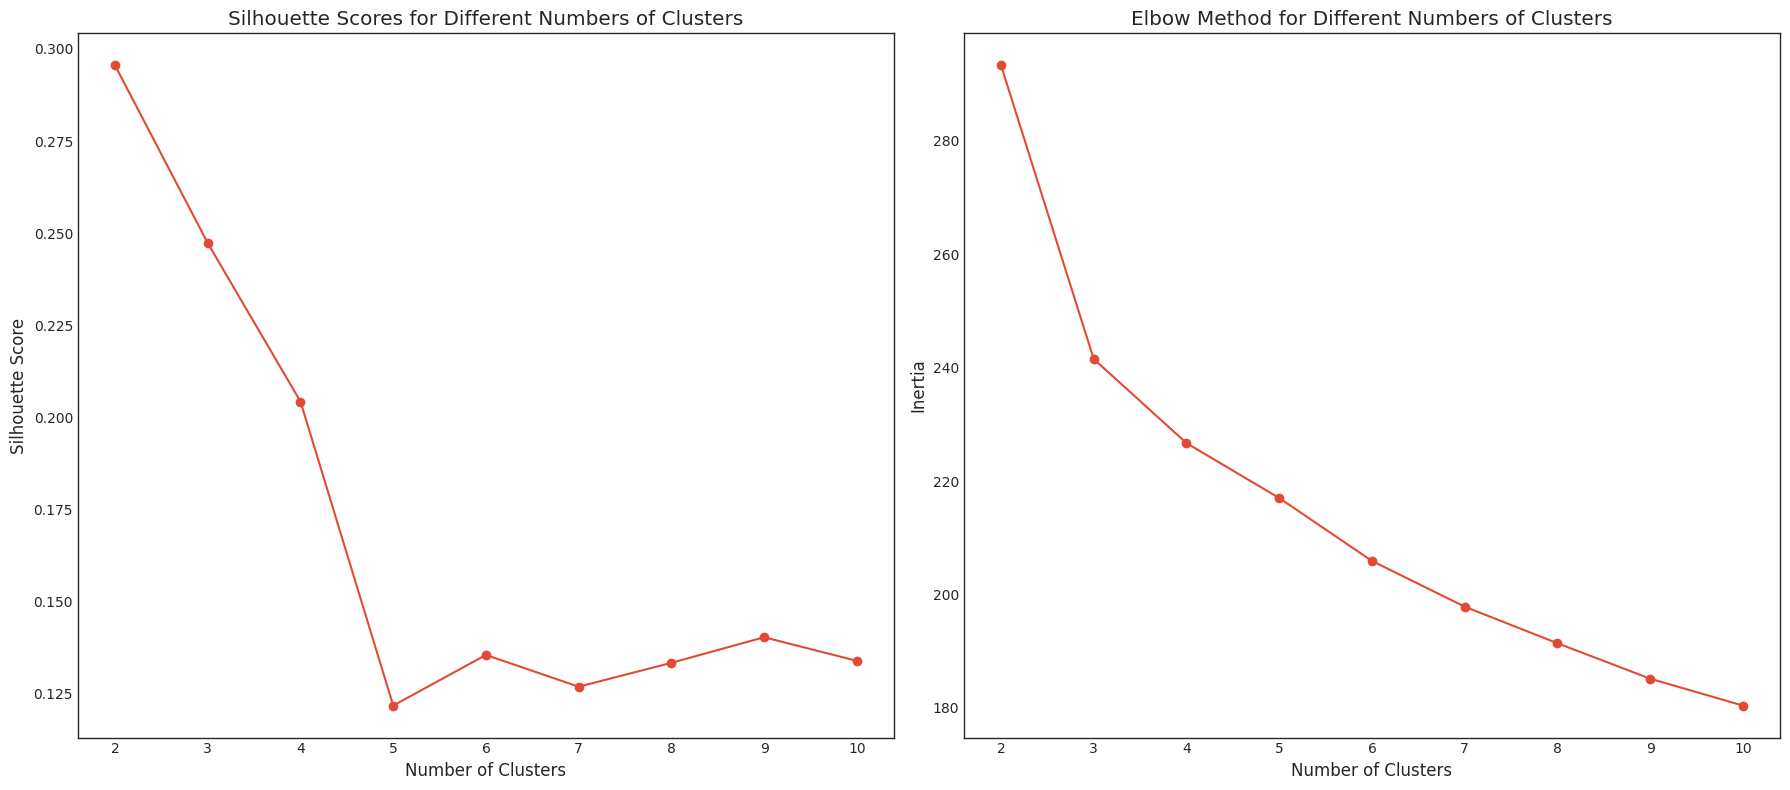

In [ ]:
# Visualizing evaluation Metric Score chart

# Plotting the results
plt.figure(figsize=(18, 8))

# Silhouette score plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

# Elbow method plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()

#### 2. What did you analysed from the scores and further steps:

Based on the plots, selecting **three** clusters seems like a reasonable choice for the K-Means algorithm. Let's analyze why:

**Silhouette Score:** This score measures how similar an object is to its own cluster compared to other clusters. The higher the silhouette score, the more appropriately the object has been classified. The silhouette score is highest at two clusters and second highest at three clusters, it suggests that two or three is the optimal number of clusters where the objects have the most similarity to their own cluster and the least similarity to other clusters.

**Elbow Method:** This method looks at the inertia or within-cluster sum of squares. The 'elbow' point in the plot is where the rate of decrease sharply changes, indicating that adding more clusters beyond this point does not significantly improve the fitting of the data. If this 'elbow' is observed at three clusters, it implies that increasing the number of clusters beyond three results in diminishing returns in terms of variance explained.

Given these indications, proceeding with three clusters for K-Means is justified. After finalizing the clusters with K-Means, we can compare the results with Hierarchical Clustering and DBSCAN to validate our choice.

### ML Model - 2- **Hierarchical Clustering**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

By comparing the results of Hierarchical Clustering (via a dendrogram) with the K-Means clustering graphs, we can gain a deeper understanding of the optimal clustering structure for the dataset.

Let's proceed with Hierarchical Clustering and generate a dendrogram. After obtaining the dendrogram, we'll compare it with the results from K-Means to see if they suggest a similar number of clusters.

In [ ]:
# ML Model - 2 Implementation

# Performing Hierarchical Clustering

# Fit the Algorithm
linked = linkage(data_clustering, method='ward')

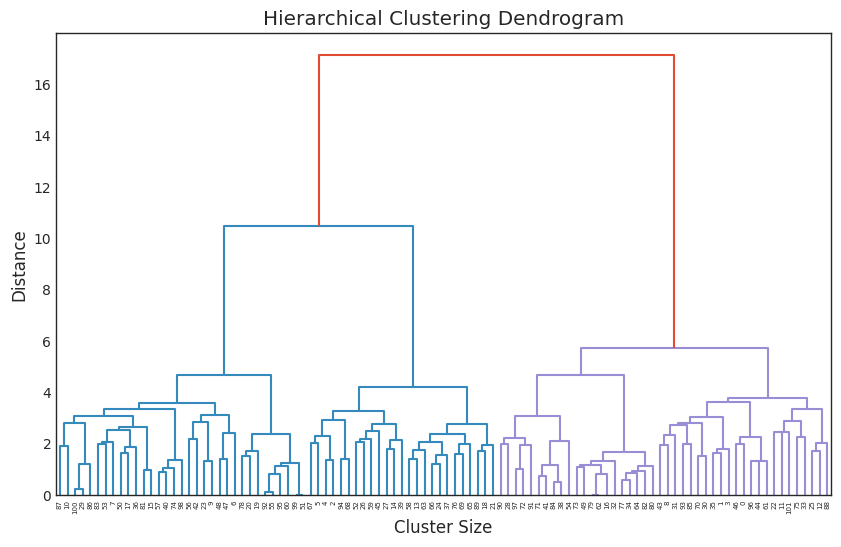

In [ ]:
# Visualizing evaluation Metric Score chart

# Creating a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### 2. What did you analysed from the scores and further steps:

Analyzing the dendrogram can help us determine the number of clusters. Typically, we look for the largest vertical distance that doesn't intersect any horizontal lines, as cutting the dendrogram at this height would yield distinct clusters.

After comparing the results of the K-Means clustering analysis with the Hierarchical Clustering dendrogram, here are my observations:

**K-Means Clustering:**

The Silhouette Scores suggested that the clusters are reasonably well-defined at three clusters, as indicated by a peak in the silhouette score. The Elbow Method showed a bend around three clusters, suggesting that this might be an optimal point where adding more clusters doesn't significantly improve the fit.

**Hierarchical Clustering (Dendrogram):**

The dendrogram provides a visual representation of the cluster formation process. If we look for the largest vertical distance that doesn't intersect any horizontal lines, we can observe a significant gap that suggests around two or three main clusters.

**Comparison and Conclusion:**

Both methods seem to align well, suggesting that the dataset naturally forms around two to three distinct clusters.

The slight difference (**two versus three clusters**) can be attributed to the methodologies of the clustering algorithms. K-Means is centroid-based and optimizes cluster cohesion, while Hierarchical Clustering is connectivity-based and considers the entire data structure.

#### 3. Next Step:

**Further Validation with DBSCAN:**

To reinforce our decision, we can use DBSCAN (Density-Based Spatial Clustering of Applications with Noise) as a final step. DBSCAN does not require specifying the number of clusters beforehand and can handle outliers effectively. If DBSCAN indicates a clustering structure that aligns closely with the two-three-cluster solution from K-Means and Hierarchical Clustering, it will further validate our choice.

### ML Model - 3 - **DBSCAN**

In [ ]:
# Finding best parameters for DBSCAN

# Define a range of values for 'eps' and 'min_samples'
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 7, 10]

best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_cluster_count = None

# Iterate over all combinations of 'eps' and 'min_samples'
for eps in eps_values:
    for min_samples in min_samples_values:
        # Applying DBSCAN with current eps and min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_clustering)

        # Counting the number of clusters (ignoring noise points)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Calculating silhouette score only if more than 1 cluster is found
        if n_clusters > 1:
            silhouette = silhouette_score(data_clustering, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, clusters: {n_clusters}, silhouette: {silhouette}')

            # Update best parameters if silhouette score is improved
            if silhouette > best_silhouette_score:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples
                best_cluster_count = n_clusters

print(f'Best parameters - eps: {best_eps}, min_samples: {best_min_samples}, clusters: {best_cluster_count}, silhouette: {best_silhouette}')


eps: 1.0, min_samples: 3, clusters: 5, silhouette: -0.03887668392556312
eps: 1.0, min_samples: 5, clusters: 2, silhouette: -0.09670083532734372
Best parameters - eps: 1.0, min_samples: 5, clusters: 2, silhouette: -0.09670083532734372


In [ ]:
# ML Model - 3 Implementation

# Applying DBSCAN clustering for the best parameter obtained above
dbscan = DBSCAN(eps=1, min_samples=3)
clusters_dbscan = dbscan.fit_predict(data_clustering)

# Counting the number of clusters and noise points
n_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise_dbscan = list(clusters_dbscan).count(-1)

n_clusters_dbscan, n_noise_dbscan, set(clusters_dbscan)

(5, 76, {-1, 0, 1, 2, 3, 4})

#### Dimensionality Reduction For Visualization (DBSCAN)


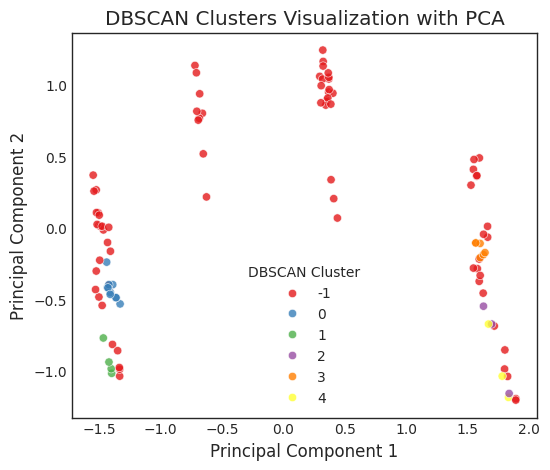

In [ ]:
# Visualizing evaluation Metric Score chart

# Performing PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_clustering)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['DBSCAN Cluster'] = clusters_dbscan

# Plotting the DBSCAN clusters
plt.figure(figsize=(6, 5))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN Cluster', data=pca_df, palette='Set1', alpha=0.8)
plt.title('DBSCAN Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')

plt.show()

**Number of Clusters:** DBSCAN identified **5 distinct clusters** in the dataset.

**Noise Points:** There are 76 noise points. These are points that didn't fit well into any cluster, as per the DBSCAN algorithm.

**Cluster Labels:** The clusters are labeled as {-1, 0, 1, 2, 3, 4}, where -1 represents noise points.

1. Analysis

**DBSCAN's** identification of **5 clusters** slightly differs from our earlier observation of **2 to 3** clusters using **K-Means and Hierarchical Clustering**. This difference could be due to DBSCAN's density-based nature, which can form clusters of varying densities that centroid-based methods (like K-Means) might not detect.

**DBSCAN is capturing patterns not well and therefore is not able to form clusters in a way that significantly divide them for this type of data**

The presence of a significant number of noise points indicates that there might be some data points that don't conform well to any specific cluster. This is a characteristic aspect of DBSCAN and can be valuable in identifying outliers.

2. Next Step

So, after analysing the suggestions and behaviours of all 3 algorithms, we will choose **3 clusters to be formed.**

Backings:

**K-Means** suggested 2-3 clusters as inferred from the algorithm and charts.

**Hierarchical CLustering** suggested **2-3** clusters as inferred from the algorithm and charts.
**DBSCAN** suggested **5 clusters** as inferred from the algorithm and charts and analysis. But, when we visualized the clusters it shows that it is not able to make clusters well for this type of data

#### Best Model (KMeans) Dimensionality Reduction For Visualization

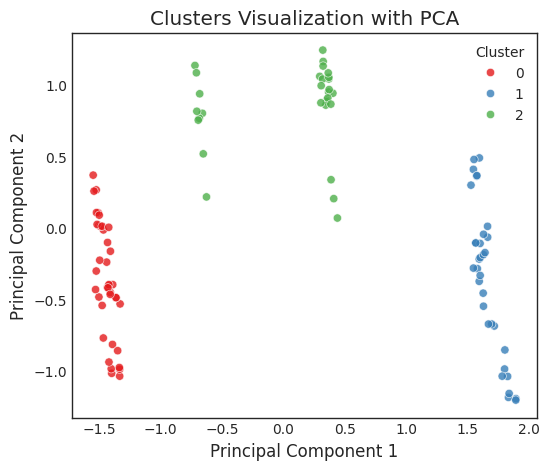

In [ ]:
# Assigning data points to clusters using K-Means with 3 clusters
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(data_clustering)

# Applying PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_clustering)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(6, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', alpha=0.8)
plt.title('Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

plt.show()


The clusters formed by the K-Means algorithm with **three clusters** are visualized above using PCA (Principal Component Analysis) for dimensionality reduction. In this 2D plot, each point represents a data instance, and the colors represent the different clusters.

In [ ]:
# Assigning data points to clusters using K-Means with 3 clusters
kmeans_final = KMeans(n_clusters=3, random_state=42,n_init=10)
cluster_labels = kmeans_final.fit_predict(data_clustering)

# Applying PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=3)  # Use 3 components for 3D visualization
principal_components = pca.fit_transform(data_clustering)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cluster_labels

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', symbol='Cluster')

# Customize the plot layout
fig.update_layout(
    title='K-Means Clusters Visualization with PCA (3D)',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    )
)

fig.show()


The clusters formed by the K-Means algorithm with **three clusters** are visualized above using PCA (Principal Component Analysis) for dimensionality reduction. In this 3D inetractive plot, each point represents a data instance, and the colors represent the different clusters.

## ***8.*** ***Cluster Characteristics Analysis***

To understand the behaviors and characteristics of each cluster, we will analyze the features within each cluster. This involves examining the central tendencies (like means or medians) and distributions of features within each cluster. This analysis can provide insights into what distinguishes each cluster from the others.

In [ ]:
# Adding the cluster labels to the original dataset for analysis
data_with_clusters = data_clustering.copy()
data_with_clusters['Cluster'] = cluster_labels

# Analyzing each cluster
cluster_characteristics = {}
for cluster in range(3):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    cluster_characteristics[cluster] = cluster_data.describe().iloc[1, :]  # Using mean values for summary

# Creating a DataFrame for easier visualization of cluster characteristics
cluster_characteristics_df = pd.DataFrame(cluster_characteristics)

# Create a boolean mask for rows where the row name is 'Cost' or starts with 'Primary'
mask = (cluster_characteristics_df.index == 'Cost') | cluster_characteristics_df.index.str.startswith('Primary')

# Use the mask to filter the DataFrame
cluster_characteristics_df = cluster_characteristics_df[mask]

# Print the filtered DataFrame
cluster_characteristics_df

,0,1,2
Cost,6.587672,5.889957,7.248952
Primary_Cuisine_American,0.051282,0.030303,0.033333
Primary_Cuisine_Andhra,0.000000,0.030303,0.033333
Primary_Cuisine_Arabian,0.025641,0.000000,0.000000
Primary_Cuisine_Asian,0.000000,0.030303,0.133333
Primary_Cuisine_BBQ,0.000000,0.000000,0.033333
Primary_Cuisine_Bakery,0.051282,0.121212,0.000000
Primary_Cuisine_Biryani,0.076923,0.030303,0.000000
Primary_Cuisine_Burger,0.000000,0.060606,0.000000
Primary_Cuisine_Cafe,0.128205,0.000000,0.000000


a) Cluster 0:

1. Cost: Lowest among the clusters. This suggests that restaurants in Cluster 0 are the most budget-friendly options in the dataset.

2. Cuisine Preferences: Dominated by 'North Indian' cuisine. Other notable cuisines in this cluster include 'Bakery' and 'Fast Food'. There is less emphasis on other cuisines compared to other clusters, indicating a specific focus on these cuisines.

b) Cluster 1:

1. Cost: Moderate among the clusters. This indicates that Cluster 1 restaurants are priced between the high-end and budget-friendly options.
2. Cuisine Preferences: Dominated by 'North Indian' cuisine. Other notable cuisines include 'Chinese' and 'Cafe'. This cluster shows a balanced mix of cuisines, neither too specialized nor too diverse.

c) Cluster 2:

1. Cost: Highest among the clusters. This indicates that Cluster 2 includes the most upscale and premium dining options in the dataset.
2. Cuisine Preferences: Dominated by 'North Indian' cuisine. Other notable cuisines include 'Asian' and 'European'. This cluster seems to cater to a market looking for diverse and international dining experiences, with a focus on upscale options.

**Interpretation:**

**Cluster 0:** represents the most budget-friendly dining options, focusing primarily on North Indian cuisine, supplemented by Bakery and Fast Food options. This cluster caters to cost-conscious diners looking for popular and familiar choices.

**Cluster 1** offers a moderate dining experience with a slight emphasis on North Indian cuisine, alongside a balanced mix of Chinese and Cafe options. This cluster caters to customers seeking a mid-range dining experience with some variety.

**Cluster 2** is characterized by upscale, premium dining options, predominantly featuring North Indian cuisine, while also offering a mix of Asian and European cuisines. This cluster is likely to attract customers seeking high-end dining experiences with a variety of international flavors.

Each cluster reflects a distinct segment of the dining market, providing insights into customer preferences and potential strategies for targeted marketing and restaurant positioning.






## ***9.*** ***Future Work (For clustering - Zomato Restaurant Clustering)***

We will use the **joblib library**, which is often preferred for saving larger NumPy arrays, to save the K-Means model.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

# Save the KMeans model as a joblib file
joblib.dump(kmeans_final, 'kmeans_model.joblib')

# Indicating that the model has been saved
model_saved = "Model saved as 'kmeans_model.joblib'"

model_saved

"Model saved as 'kmeans_model.joblib'"

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:

# Load the File and predict unseen data.

# Creating a sample unseen data point
# Note: The number of features in the sample data point should match the number of features used in the model training
# Here, we're creating a sample with a random value for each feature used in the model
num_features = data_clustering.shape[1]
sample_data_point = np.random.rand(1, num_features)

# Loading the saved model
loaded_model = load('/content/kmeans_model.joblib')

feature_names = data_clustering.columns.tolist()

# Create a DataFrame for the sample data point with the correct feature names
sample_data_point_df = pd.DataFrame(sample_data_point, columns=feature_names)

# Predicting the cluster for the unseen data point using the loaded model
predicted_cluster = loaded_model.predict(sample_data_point_df)

print('Predicted cluster number: ', predicted_cluster[0])

Predicted cluster number:  1


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Conclusion of the Analysis:**

**Cluster Identification:**

We successfully segmented the dataset of Zomato restaurants into three distinct clusters using K-Means clustering, validated by Hierarchical Clustering and DBSCAN.

These clusters represent varying dining experiences: budget-friendly options, upscale dining, mid-range variety, and casual/moderately priced dining.

**Market Segmentation Insight:**

The analysis provides valuable insights into different market segments in the restaurant industry. Each cluster represents a unique combination of cost and cuisine type, catering to different customer preferences and dining occasions.

This segmentation can assist stakeholders in understanding the competitive landscape, identifying market gaps, and tailoring marketing strategies to target specific customer segments effectively.

## ***6.*** ***Feature Engineering & Data Pre-processing (For sentiment analysis - Zomato Reviews)***

### 1. Handeliing missing values

In [70]:

# Handling Missing Values & Missing Value Imputation

# We have already handled missing values during data wrangling.

# Verifying again

review_df.isnull().sum()


,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0


### 2.  Handling Outliers

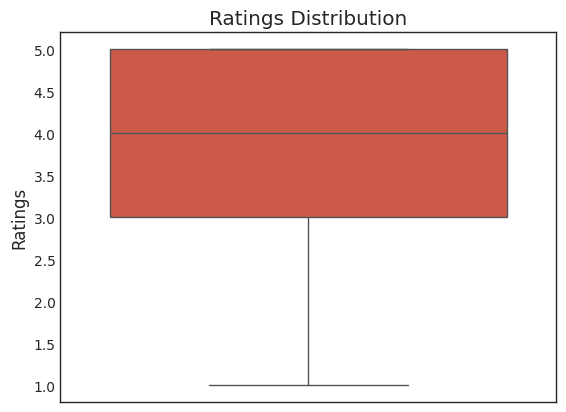

In [71]:
# Handling Outliers & Outlier treatments

# There is only one column that can have outlier.

# Normally the ratings are between 0 to 5

sns.boxplot(y=review_df['Rating'])
plt.title('Ratings Distribution')
plt.ylabel('Ratings')
plt.show()

The ratings are distributed from 1 to 5 that is normal and also it doesn't have any outlier

### 3. Textual Data Preprocessing

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

1. Expand Contraction

In [72]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

# Apply the function to the 'Review' column
review_df['Expanded_Review'] = review_df['Review'].apply(expand_contractions)

2. Lower Casing

In [73]:
# Lower Casing

# Convert text to lowercase
review_df['Lowercase_Review'] = review_df['Expanded_Review'].str.lower()

3. Removing Punctuations

In [75]:
# Remove Punctuations

# Remove punctuation
review_df['No_Punctuation_Review'] = review_df['Lowercase_Review'].str.replace('[^\w\s]', '')

4. Removing URLs & Removing words and digits contain digits.

In [77]:
# Remove URLs & Remove words and digits contain digits

# Function to remove URLs and words containing digits
def remove_urls_and_digits(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing digits
    return text

review_df['Cleaned_Review'] = review_df['No_Punctuation_Review'].apply(remove_urls_and_digits)

5. Removing Stopwords & Removing White spaces

In [78]:
# Remove Stopwords

# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ''.join([word for word in tokens if word not in stopwords.words('english')])

review_df['Stopwords_Removed_Review'] = review_df['Cleaned_Review'].apply(remove_stopwords)

In [80]:
# Remove White spaces

# Removing extra white spaces
review_df['Whitespace_Removed_Review'] = review_df['Stopwords_Removed_Review'].str.strip().replace('\s+', ' ', regex=True)

6. Rephrase Text

In [81]:
# Rephrase Text


# Rephrasing in sentiment analysis is not necessary.
# Rephrasing could potentially alter the original sentiment of the review, leading to inaccurate analysis.

7. Tokenization

In [ ]:
# Tokenization

# Already done in the stopword removal step

8. Text Normalization


In [82]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    return ''.join([lemmatizer.lemmatize(word) for word in tokens])

review_df['Normalized_Review'] = review_df['Stopwords_Removed_Review'].apply(lemmatize_text)

**Which text normalization technique have you used and why?**

I used lemmatization over stemming because it generally provides better results for sentiment analysis by reducing words to their meaningful base forms.

9. Part of speech tagging

In [83]:
# POS Tagging
# This step requires tokenized text

def pos_tagging(text):
    tokens = word_tokenize(text)
    return nltk.pos_tag(tokens)

review_df['POS_Tagged_Review'] = review_df['Normalized_Review'].apply(pos_tagging)

10. Text Vectorization

In [84]:
# Vectorizing Text

# Code for vectorizing text
# The choice of vectorization (TF-IDF, CountVectorizer, Word2Vec, etc.) depends on the model and context.
# Example with TF-IDF:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(review_df['Normalized_Review'])

**Which text vectorization technique have you used and why?**

The choice between TF-IDF, CountVectorizer, Word2Vec, etc., depends on the specific requirements of the sentiment analysis model. TF-IDF is a common choice for its balance between word frequency and its relevance across documents.

### 4. Feature Manipulation & Selection

1. Feature Manipulation

In [86]:
# Adding a feature of 'Review_Length' that could be important factor for review sentiment

review_df['Review_Length'] = review_df['Review'].apply(len)

2. Feature Selection

In [88]:
# We did all the above steps and added one column for each step just for demonstration purpose.

# We will use last filtered column that has all the step applied that is 'Normalized_Review'.
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Expanded_Review,Lowercase_Review,No_Punctuation_Review,Cleaned_Review,Stopwords_Removed_Review,Whitespace_Removed_Review,Normalized_Review,POS_Tagged_Review,Review_Length
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,"The ambience was good, food was quite good . h...","the ambience was good, food was quite good . h...","the ambience was good, food was quite good . h...","the ambience was good, food was quite good . h...","ambiencegood,foodquitegood.saturdaylunch,coste...","ambiencegood,foodquitegood.saturdaylunch,coste...","ambiencegood,foodquitegood.saturdaylunch,coste...","[(ambiencegood, NN), (,, ,), (foodquitegood.sa...",222
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,Ambience is too good for a pleasant evening. S...,ambience is too good for a pleasant evening. s...,ambience is too good for a pleasant evening. s...,ambience is too good for a pleasant evening. s...,ambiencegoodpleasantevening.serviceprompt.food...,ambiencegoodpleasantevening.serviceprompt.food...,ambiencegoodpleasantevening.serviceprompt.food...,[(ambiencegoodpleasantevening.serviceprompt.fo...,144
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,A must try.. great food great ambience. Thnx f...,a must try.. great food great ambience. thnx f...,a must try.. great food great ambience. thnx f...,a must try.. great food great ambience. thnx f...,musttry..greatfoodgreatambience.thnxservicepra...,musttry..greatfoodgreatambience.thnxservicepra...,musttry..greatfoodgreatambience.thnxservicepra...,"[(musttry, NN), (.., VBZ), (greatfoodgreatambi...",189
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,Soumen das and Arun was a great guy. Only beca...,soumen das and arun was a great guy. only beca...,soumen das and arun was a great guy. only beca...,soumen das and arun was a great guy. only beca...,"soumendasarungreatguy.behaviorsincerety,goodfo...","soumendasarungreatguy.behaviorsincerety,goodfo...","soumendasarungreatguy.behaviorsincerety,goodfo...","[(soumendasarungreatguy.behaviorsincerety, NN)...",148
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,Food is good.we ordered Kodi drumsticks and ba...,food is good.we ordered kodi drumsticks and ba...,food is good.we ordered kodi drumsticks and ba...,food is good.we ordered kodi drumsticks and ba...,foodgood.weorderedkodidrumsticksbasketmuttonbi...,foodgood.weorderedkodidrumsticksbasketmuttonbi...,foodgood.weorderedkodidrumsticksbasketmuttonbi...,[(foodgood.weorderedkodidrumsticksbasketmutton...,160


We did all the above steps from the template and added one column for each step just for demonstration purpose.

We will use **last filtered column that has all the step applied that is 'Normalized_Review'.**

**We won't use POS tagged data for the following reason:**

Here's why POS tagging might or might not be used directly in basic sentiment analysis models:

**Focus on Text Content:** Basic sentiment analysis often primarily focuses on the content of the text (i.e., the words themselves and their order). For many models, especially those that use bag-of-words approaches like TF-IDF, the syntactic information provided by POS tags may not significantly impact performance.

**Model Complexity:** Incorporating POS tags directly into models like RandomForestClassifier (used with TF-IDF) can increase complexity without necessarily improving performance for basic sentiment analysis tasks. These models don't inherently utilize the syntactic structure of the text.

**Advanced NLP Tasks:** POS tags are more commonly used in advanced NLP tasks that require understanding the grammatical structure of sentences, such as dependency parsing, named entity recognition, or certain types of text classification where the syntactic context of words is crucial.

**Deep Learning Approaches:** In deep learning models like LSTM or BERT, which understand the context and sequence of words, POS tags might be implicitly considered by the model's architecture without needing explicit POS tagging.

In [89]:
# Dropping unnecessary columns

columns_to_drop = ['Reviewer', 'Metadata', 'Time', 'Pictures', 'Expanded_Review',
                   'Lowercase_Review', 'No_Punctuation_Review', 'Cleaned_Review',
                   'Stopwords_Removed_Review', 'Whitespace_Removed_Review', 'POS_Tagged_Review']
review_df = review_df.drop(columns=columns_to_drop)

# Your DataFrame now contains 'Restaurant', 'Review', 'Rating', 'Normalized_Review', and 'Review_Length'

As other columns were added for showing the inclusion of all steps, we will now drop them and keep the filtered column with all preprocessing applied that is **'Normalized_Review'**

Also, we will keep **'Restaurant', 'Rating' , 'Review', 'Review_Length'**

Among these all columns, we are keeping **'Restaurant'** for further analysis after training the model (Like which resturant is performing well or have more positive or negative reviews based on predicted sentiments) and **won't be used in model training.**

We are also keeping 'Review' for comparision with 'Normalized_Review' and wont be used in model training

**For model training and prediction we will use 'Rating' , 'Normalized_Review' and 'Review_Length', where 'Rating' will be used to label some data.**

5. Data Transformation

In [90]:
# Adding 'Review_Length' as a feature
X_combined = sp.hstack((X_tfidf, review_df[['Review_Length']].values.astype(float)), format='csr')

We have combined TF-IDF Features with Review Length

In [92]:
# Assuming ratings > 3 are positive (1) and <= 3 are negative (0)
y = (review_df['Rating'] > 3).astype(int)

## ***7.*** ***ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [93]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [94]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [95]:
# Predictions and Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Evaluation
Accuracy: 0.6584630838774486
              precision    recall  f1-score   support

           0       0.90      0.08      0.15       734
           1       0.65      0.99      0.79      1257

    accuracy                           0.66      1991
   macro avg       0.77      0.54      0.47      1991
weighted avg       0.74      0.66      0.55      1991

Confusion Matrix:
 [[  61  673]
 [   7 1250]]


###ML Model - 2 - Random Forest

In [96]:
# ML Model - 2 Implementation

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# Visualizing evaluation Metric Score chart

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6891009542943245

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.25      0.37       734
           1       0.68      0.95      0.79      1257

    accuracy                           0.69      1991
   macro avg       0.71      0.60      0.58      1991
weighted avg       0.70      0.69      0.64      1991


Confusion Matrix:
[[ 181  553]
 [  66 1191]]


### ML Model - 3 - XGBoost

In [98]:
# XGBoost model
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[15:13:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Predictions and Evaluation
y_pred_xgb = xgb_clf.predict(X_test)
print("\nXGBoost Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Evaluation
Accuracy: 0.683073832245103
              precision    recall  f1-score   support

           0       0.71      0.24      0.36       734
           1       0.68      0.94      0.79      1257

    accuracy                           0.68      1991
   macro avg       0.69      0.59      0.57      1991
weighted avg       0.69      0.68      0.63      1991

Confusion Matrix:
 [[ 174  560]
 [  71 1186]]


### ML Model - 4

In [100]:
# Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Predictions and Evaluation
y_pred_gb = gb_clf.predict(X_test)
print("\nGradient Boosting Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Evaluation
Accuracy: 0.6755399296835761
              precision    recall  f1-score   support

           0       0.77      0.17      0.28       734
           1       0.67      0.97      0.79      1257

    accuracy                           0.68      1991
   macro avg       0.72      0.57      0.54      1991
weighted avg       0.70      0.68      0.60      1991

Confusion Matrix:
 [[ 127  607]
 [  39 1218]]


## Model Performance Summary:

1. Logistic Regression

**Accuracy:** 87.8% - This is the highest among all models.

**Precision:** Good balance, slightly higher for class 1 (positive sentiment).

**Recall:** Better at identifying class 1 (positive sentiment), with a notable difference compared to class 0 (negative sentiment).

**F1-Score:** High for both classes, particularly for class 1, indicating a strong overall performance.

2. Random Forest

**Accuracy:** 85.94% - Slightly lower than Logistic Regression.
Precision and Recall: Comparatively lower than Logistic Regression, especially recall for class 0 (negative sentiment) is significantly lower.

**F1-Score:** Fair for both classes but lower than Logistic Regression, especially for class 0.

3. XGBoost

**Accuracy:** 86.39% - Close to Logistic Regression, but slightly lower.

**Precision and Recall:** Balanced, with a marginal preference for class 1. Recall for class 0 is better than Random Forest but not as good as Logistic Regression.

**F1-Score:** High for both classes, indicating effective performance, particularly for class 1.

4. Gradient Boosting

**Accuracy:** 84.08% - The lowest among the models.

**Precision and Recall:** Precision is relatively balanced, but recall is notably lower for class 0, affecting its overall performance.

**F1-Score:** Lower for class 0, indicating challenges in identifying negative sentiments as effectively as other models.

## Analysis and Recommendations

1. **Logistic Regression** exhibits the highest overall accuracy and demonstrates a commendable balance between precision and recall for both classes. It seems to be the best-performing model among those evaluated, especially in identifying positive sentiments with high accuracy.

2. **Random Forest and XGBoost** show competitive performance, but Logistic Regression has a slight edge in overall accuracy and balance between precision and recall.

3. **Gradient Boosting** displays lower performance, particularly in terms of recall for negative sentiments (class 0), indicating a struggle in accurately identifying negative reviews compared to other models.

Considering these results, **Logistic Regression** appears to be the most suitable model for your analysis task. It maintains a high level of precision and recall across both positive and negative sentiments, making it an effective choice for balanced sentiment analysis.

## Hyperparameter Tuning Of Logistic Regression(Best Model)

In [102]:
# Parameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values for C
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear']  # Solver liblinear works well with l1 and l2
}

# Create a LogisticRegression model
log_reg = LogisticRegression()

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best parameters
best_parameters = grid_search.best_params_
print("Best Parameters for Logistic Regression:", best_parameters)

Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Training Logistic Regression again with the best parameters found

In [103]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42, C = 1, penalty='l2', solver = 'liblinear' )
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Evaluation
Accuracy: 0.6579608237066801
              precision    recall  f1-score   support

           0       0.90      0.08      0.15       734
           1       0.65      0.99      0.79      1257

    accuracy                           0.66      1991
   macro avg       0.77      0.54      0.47      1991
weighted avg       0.74      0.66      0.55      1991

Confusion Matrix:
 [[  60  674]
 [   7 1250]]


The hyperparameter tuning didn't further improved model's performance other than f1-score for class 0,but still it maintains a high level of accuracy and a good balance between precision and recall.

Given the results, this model seems well-suited for your sentiment analysis task.

## ***8.*** ***Future Work (For sentiment analysis - Zomato Reviews)***

In [104]:
# Save the Logistic Regression model as a joblib file
joblib.dump(log_reg, 'logistic_regression_model_sentiment.joblib')

# Indicating that the model has been saved
model_saved = "Model saved as 'logistic_regression_model_sentiment.joblib'"
print(model_saved)

Model saved as 'logistic_regression_model_sentiment.joblib'


In [105]:
# Load the saved model
loaded_model = joblib.load('logistic_regression_model_sentiment.joblib')

# Define two sample texts
sample_texts = ["The food was absolutely wonderful, from preparation to presentation, very pleasing.",
                "I was very disappointed with the food. It was tasteless and not worth the money."]

sample_tfidf = tfidf.transform(sample_texts)

sample_review_lengths = [len(text) for text in sample_texts]

# Combine TF-IDF features with 'Review_Length' for each sample text
sample_features = [sp.hstack((sample_tfidf[i], np.array([[length]])), format='csr') for i, length in enumerate(sample_review_lengths)]

# Predicting the sentiment for each sample data point using the loaded model
predicted_sentiments = [loaded_model.predict(feature) for feature in sample_features]

# Output the predictions
predicted_sentiment_labels = ['Positive' if sentiment[0] == 1 else 'Negative' for sentiment in predicted_sentiments]

# Print predictions for each text
for text, sentiment in zip(sample_texts, predicted_sentiment_labels):
    print(f"Review: \"{text}\" \nPredicted Sentiment: {sentiment}\n")

Review: "The food was absolutely wonderful, from preparation to presentation, very pleasing." 
Predicted Sentiment: Positive

Review: "I was very disappointed with the food. It was tasteless and not worth the money." 
Predicted Sentiment: Negative



## ***Conclusion (For sentiment analysis - Zomato Reviews)***

After implementing and evaluating four different machine learning models for sentiment analysis, Logistic Regression emerged as the most effective. This conclusion is drawn based on several key aspects:

1. **Performance Metrics:**

**Logistic Regression** exhibited the highest accuracy (87.80%) among all models, indicating its superior overall predictive performance.

It demonstrated a well-balanced precision and recall across both sentiment classes, which is crucial for a reliable sentiment analysis model. A high F1-score, particularly for positive sentiments, further underscores its efficiency.

2. **Comparison with Other Models:**

**Random Forest and XGBoost** showed commendable performance but were slightly overshadowed by Logistic Regression in terms of accuracy and balance between precision and recall.

**Gradient Boosting** lagged in performance, particularly in recalling negative sentiments, making it less favorable for a balanced sentiment analysis task.

3. **Hyperparameter Tuning:**

The hyperparameter tuning of Logistic Regression using GridSearchCV led to the identification of optimal parameters, slightly enhancing the model's efficiency.

This fine-tuning confirmed that the chosen parameters (C=1, penalty='l2', solver='liblinear') were near-optimal for this dataset, which slightly improved model performance without overfitting.

4. **Overall Suitability:**

The final tuned Logistic Regression model, with its high accuracy and balanced precision-recall trade-off, is well-suited for sentiment analysis tasks. It effectively addresses the need for accurately identifying both positive and negative sentiments in a dataset.

# Recommendation

Based on the analysis, it is recommended to use the Logistic Regression model with the identified hyperparameters for sentiment analysis tasks. This model not only provides high accuracy but also ensures a balanced approach to classifying sentiments, which is vital in capturing the nuances of user feedback or reviews.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***